In [1]:
import numpy as np
import random as rd
import tensorflow as tf

from keras.layers import Dense, Embedding, LSTM, Input
from keras.models import Model
from keras.optimizers import RMSprop

#Import another jupyter notebook
import import_ipynb
from Productive_CrossValidation_inclTest import *
from Productive_Data_GetTrainTest import samEval

C:\Users\twitter\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


importing Jupyter notebook from Productive_CrossValidation_inclTest.ipynb
importing Jupyter notebook from Productive_TimeHistory.ipynb
importing Jupyter notebook from AttentionLayer.ipynb
importing Jupyter notebook from Productive_Data_GetTrainTest.ipynb


In [2]:
#for reproducability of the results
seed = 7
np.random.seed(seed)
tf.set_random_seed(seed)
rd.seed(seed)

In [3]:
path = 'data/'
outputpath ='outputs/01_lstm_samEval2018/'

In [4]:
#Load necessary data
train_data, train_labels, test_data, test_labels, word_index, MAX_SEQUENCE_LENGTH = samEval()

In [5]:
#Load pretrained embeddings
import gensim
from gensim.models import KeyedVectors

#Pretrained Google News Embeddings, Dimension 300
GOOGLEEMB = path + 'GoogleNews-vectors-negative300.bin'

embedding= KeyedVectors.load_word2vec_format(GOOGLEEMB, binary=True)

word_vectors = embedding.wv

C:\Users\twitter\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  # Remove the CWD from sys.path while we load stuff.


In [6]:
#Create embedding-matrix, serves the Keras Embedding Layer as weigths
EMBEDDING_DIM=300

embedding_matrix = np.zeros((len(word_index)+1, EMBEDDING_DIM))

for word, i in word_index.items():
    try:
        embedding_vector = word_vectors[word]
        embedding_matrix[i] = embedding_vector   
    except:
        # words not found in embeddings will be zero
        pass

## Hyperparameter for all models

In [7]:
NUM_EPOCHS = 30
BATCH_SIZE = 64
softmax = True
optimizer = RMSprop(lr=0.001, rho = 0.9, epsilon = 0.0000001)
lossfunction ='binary_crossentropy'

Instructions for updating:
Colocations handled automatically by placer.


## LSTM with one LSTM-layer, 400 neurons

In [ ]:
wv_layer = Embedding(len(word_index)+1,
                     EMBEDDING_DIM,
                     weights=[embedding_matrix],
                     input_length=MAX_SEQUENCE_LENGTH,
                     trainable=True)

#Input Layer
comment_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')

#Embedding Layer
embedded_sequences = wv_layer(comment_input)

#LSTM Layer
x = LSTM(400, activation='tanh')(embedded_sequences)

#Output (Dense) Layer
preds = Dense(2, activation='softmax')(x)

# build the model
model1 = Model(inputs=[comment_input], outputs=preds)

Instructions for updating:
Use tf.cast instead.

-----Fold 1--------


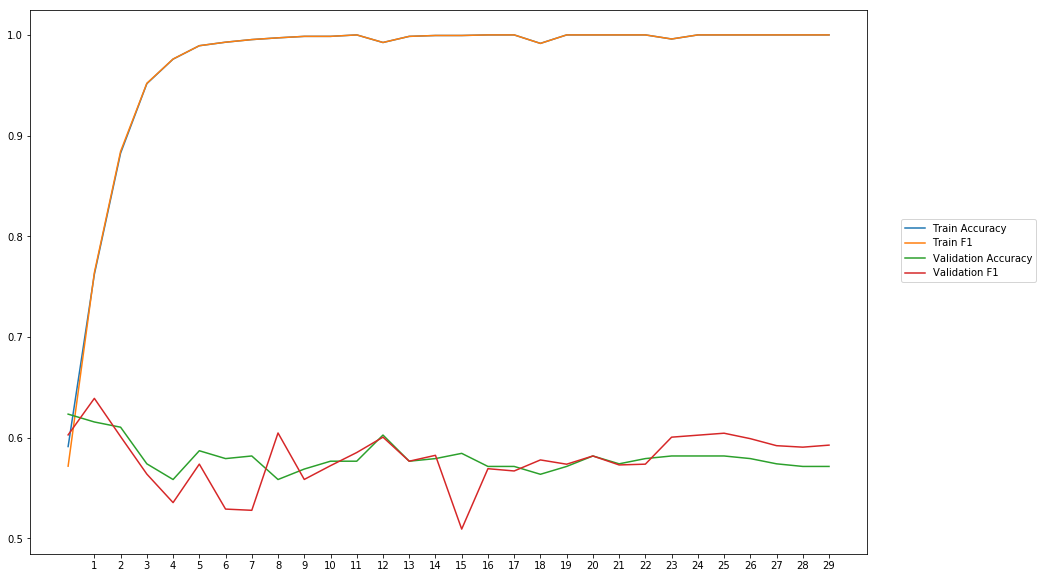

Average Accuracy: 58.03%
Average Precision: 58.34%
Average Recall: 57.79%
Average F1: 57.87%

-----Fold 2--------


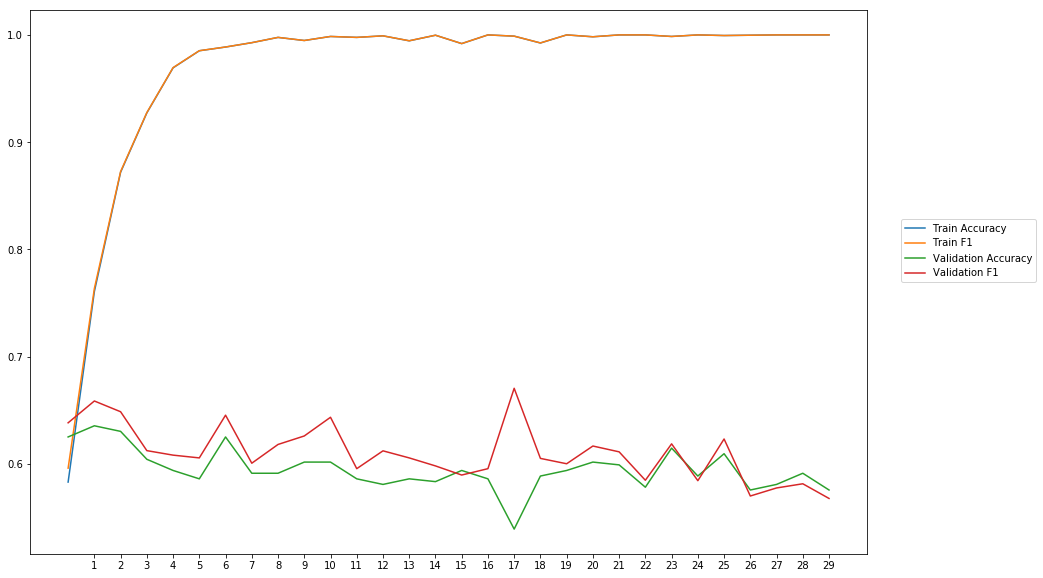

Average Accuracy: 59.45%
Average Precision: 59.13%
Average Recall: 63.51%
Average F1: 61.03%

-----Fold 3--------


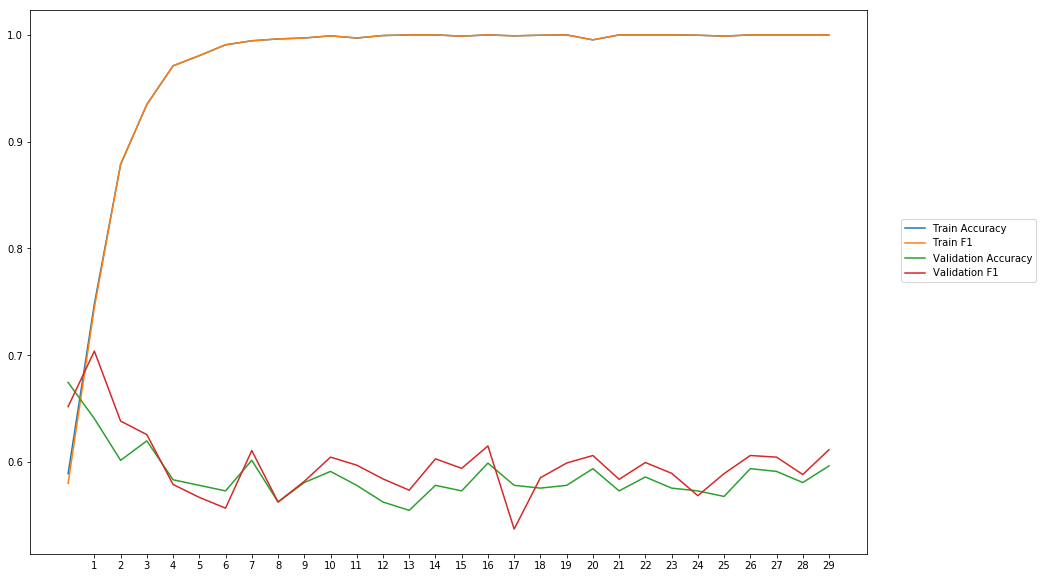

Average Accuracy: 58.72%
Average Precision: 58.62%
Average Recall: 61.16%
Average F1: 59.72%

-----Fold 4--------


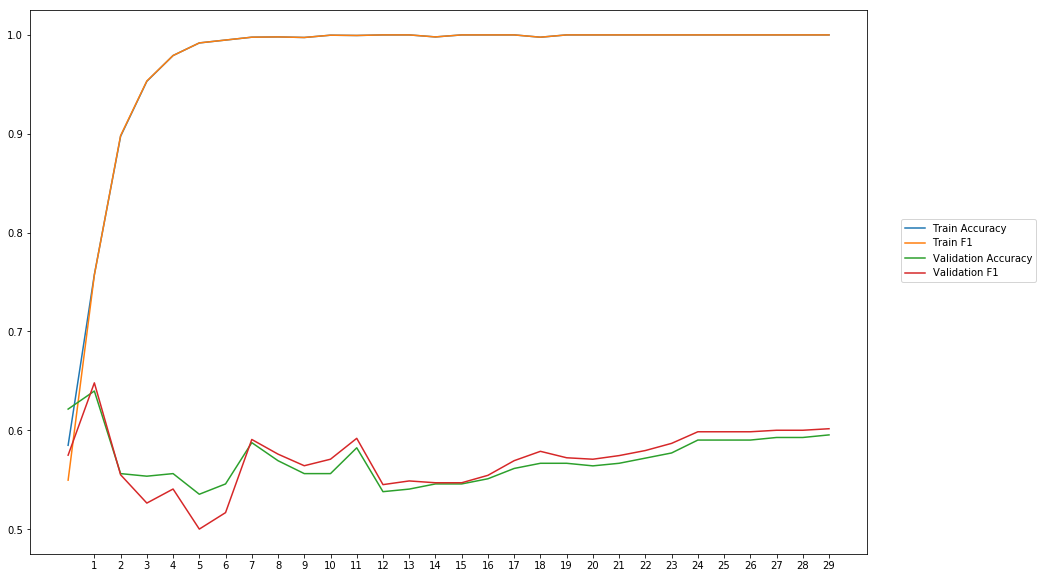

Average Accuracy: 57.01%
Average Precision: 57.15%
Average Recall: 57.15%
Average F1: 57.08%

-----Fold 5--------


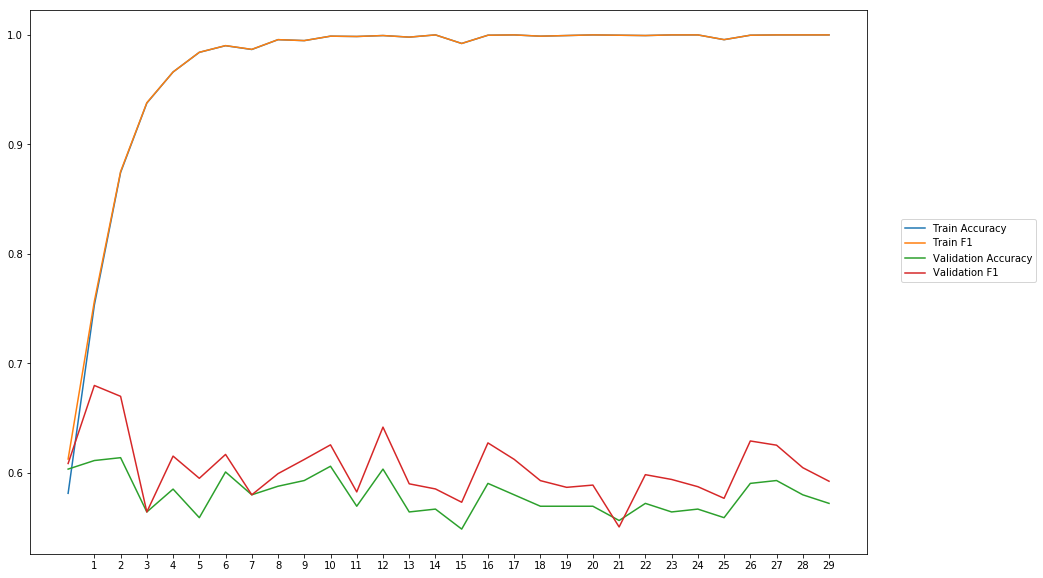

Average Accuracy: 57.94%
Average Precision: 57.17%
Average Recall: 64.06%
Average F1: 60.32%

-----Fold 6--------


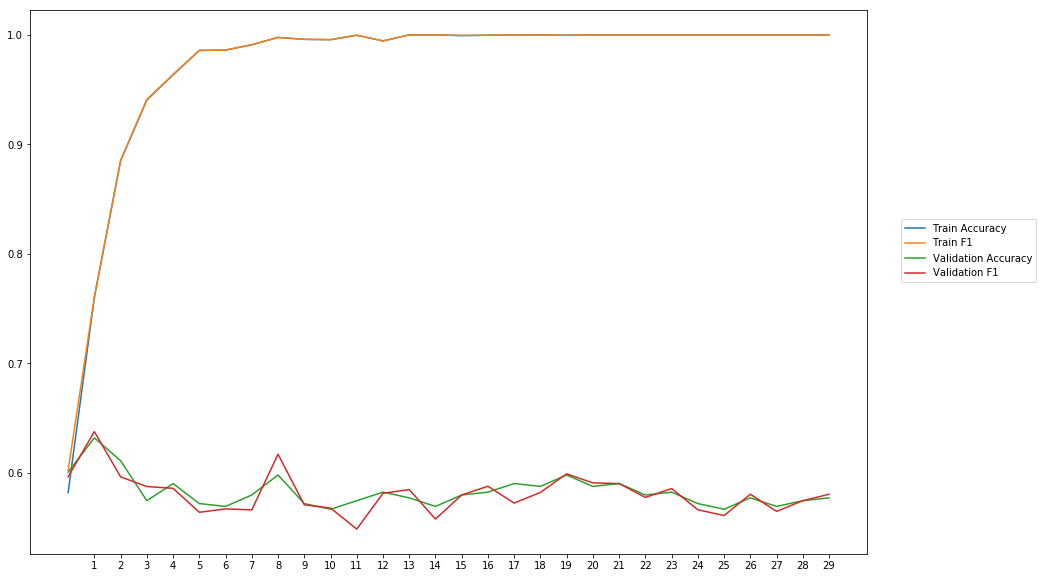

Average Accuracy: 58.27%
Average Precision: 58.50%
Average Recall: 57.67%
Average F1: 58.06%

-----Fold 7--------


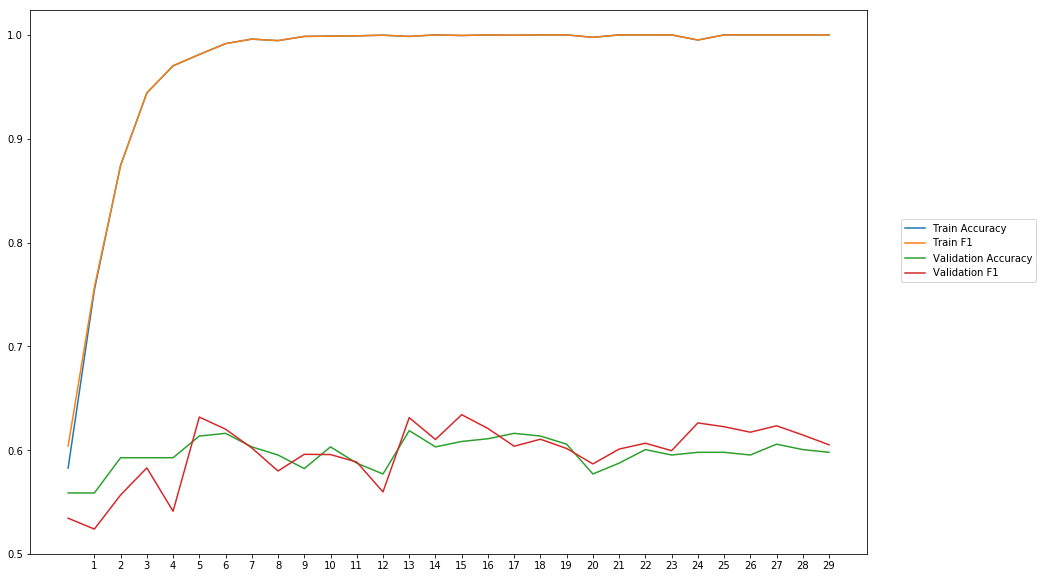

Average Accuracy: 59.69%
Average Precision: 59.78%
Average Recall: 60.00%
Average F1: 59.76%

-----Fold 8--------


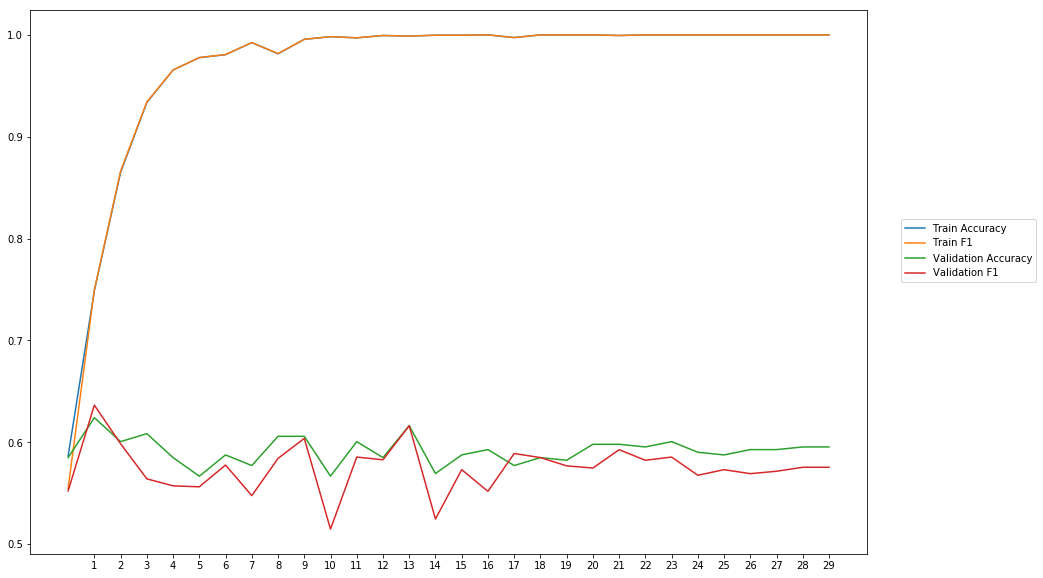

Average Accuracy: 59.17%
Average Precision: 60.13%
Average Recall: 55.19%
Average F1: 57.47%

-----Fold 9--------


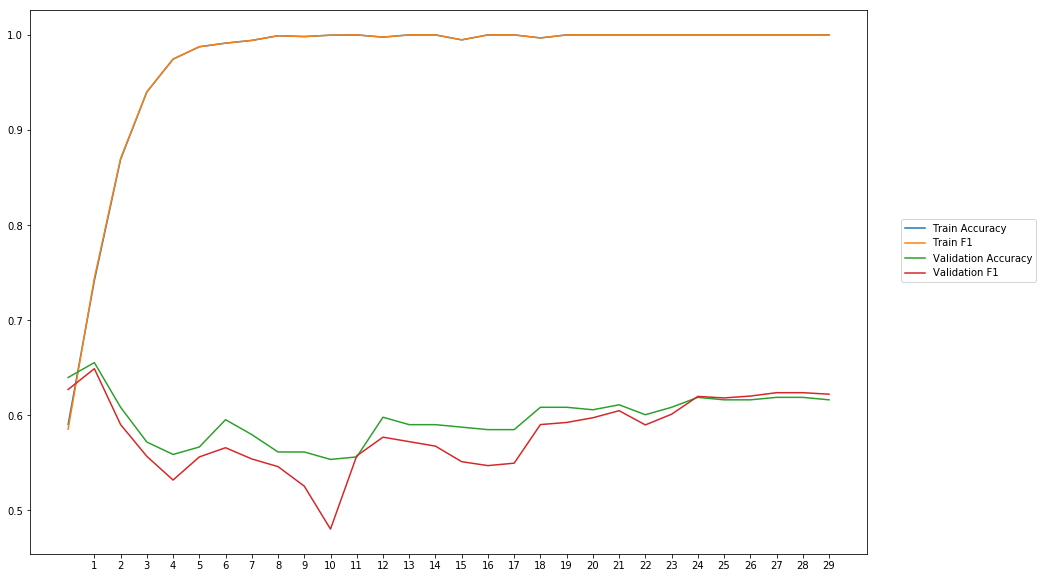

Average Accuracy: 59.63%
Average Precision: 60.50%
Average Recall: 55.90%
Average F1: 58.02%

-----Fold 10--------


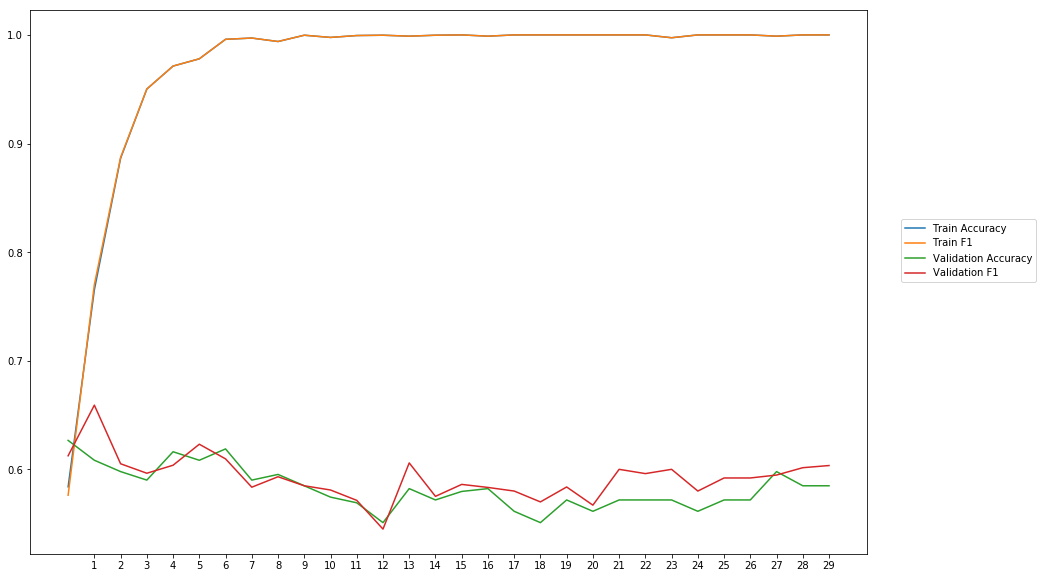

Average Accuracy: 58.27%
Average Precision: 58.09%
Average Recall: 60.64%
Average F1: 59.27%

-------Overallresults-------


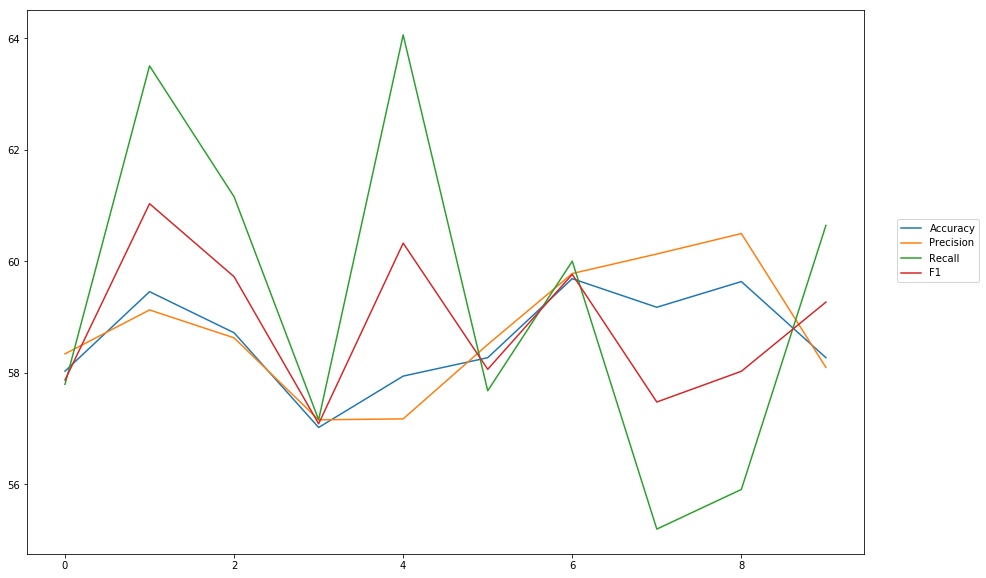

Accuracy: Mean = 58.62% (+/- 0.83%), Max = 59.69%, Min =  57.01%
Precision: Mean = 58.74% (+/- 1.09%), Max = 60.50%, Min =  57.15%
Recall: Mean = 59.31% (+/- 2.90%), Max = 64.06%, Min =  55.19%
F1: Mean = 58.86% (+/- 1.26%), Max = 61.03%, Min =  57.08%


In [8]:
cross_val(model1, NUM_EPOCHS, BATCH_SIZE, optimizer, lossfunction, train_data, train_labels, softmax, outputpath, 'lstm_1_400')  

## LSTM with two LSTM-Layer, each 400 Neurons

In [ ]:
wv_layer2 = Embedding(len(word_index)+1,
                     EMBEDDING_DIM,
                     weights=[embedding_matrix],
                     input_length=MAX_SEQUENCE_LENGTH,
                     trainable=True)

#Input Layer
comment_input2 = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')

#Embedding Layer
embedded_sequences2 = wv_layer2(comment_input2)

#BiLSTM Layer
x2 = LSTM(400,activation='tanh', return_sequences=True)(embedded_sequences2)

x2 = LSTM(400, activation='tanh')(x2)

#Output (Dense) Layer
preds2 = Dense(2, activation='softmax')(x2)

# build the model
model2 = Model(inputs=[comment_input2], outputs=preds2)


-----Fold 1--------


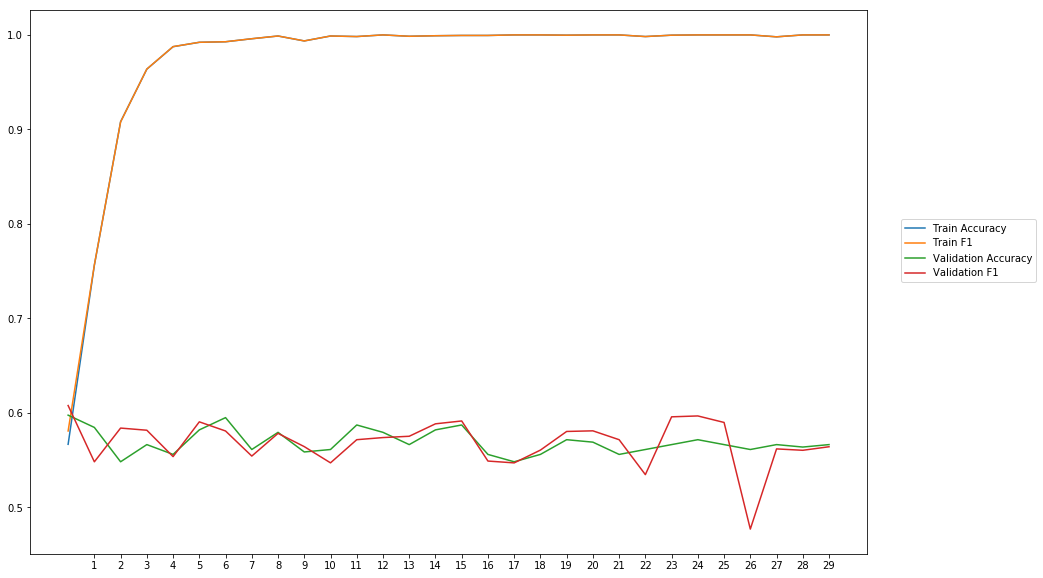

Average Accuracy: 56.89%
Average Precision: 57.10%
Average Recall: 56.87%
Average F1: 56.85%

-----Fold 2--------


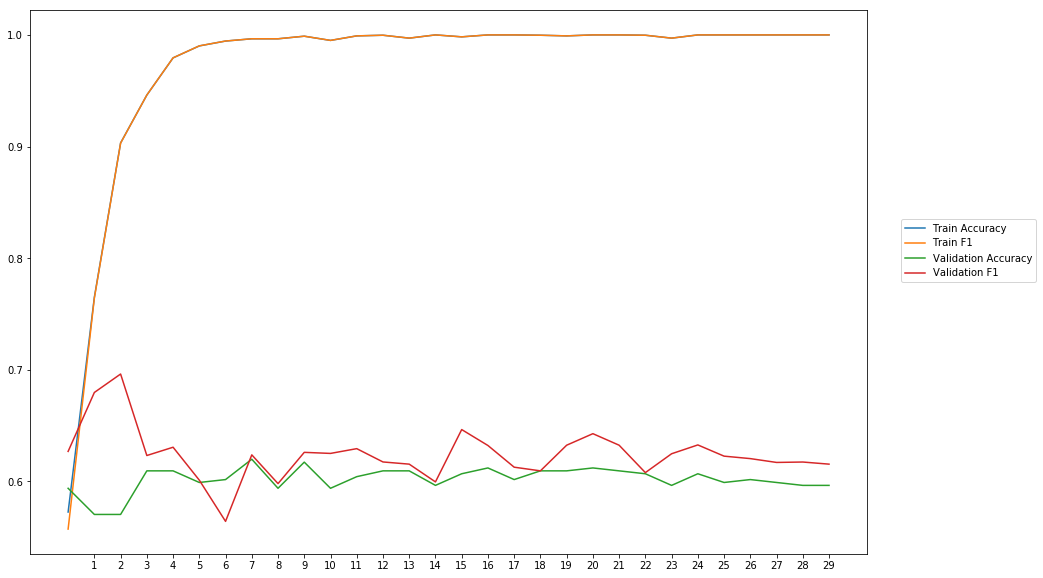

Average Accuracy: 60.20%
Average Precision: 59.59%
Average Recall: 66.23%
Average F1: 62.40%

-----Fold 3--------


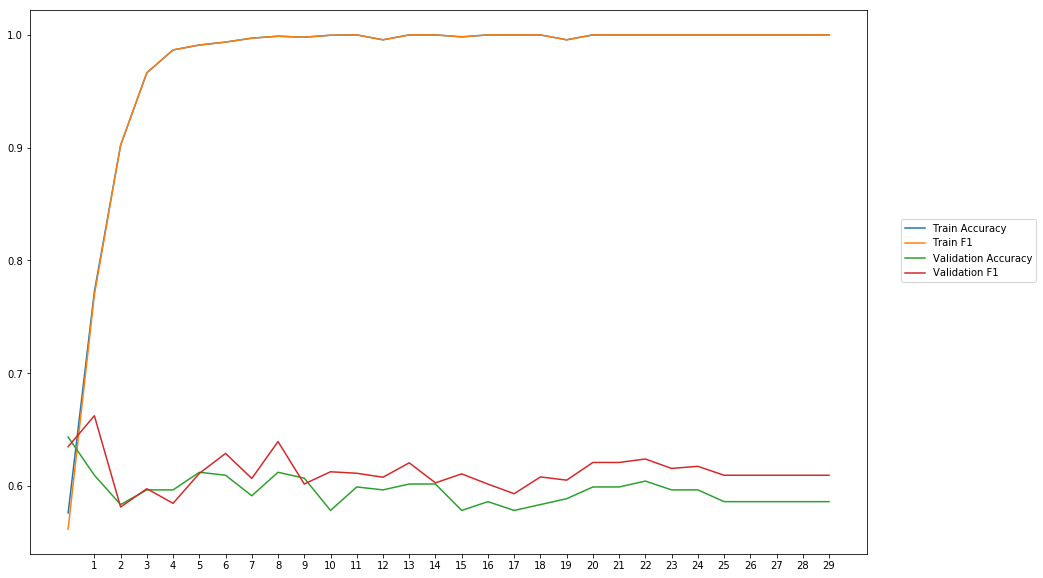

Average Accuracy: 59.58%
Average Precision: 59.18%
Average Recall: 63.54%
Average F1: 61.21%

-----Fold 4--------


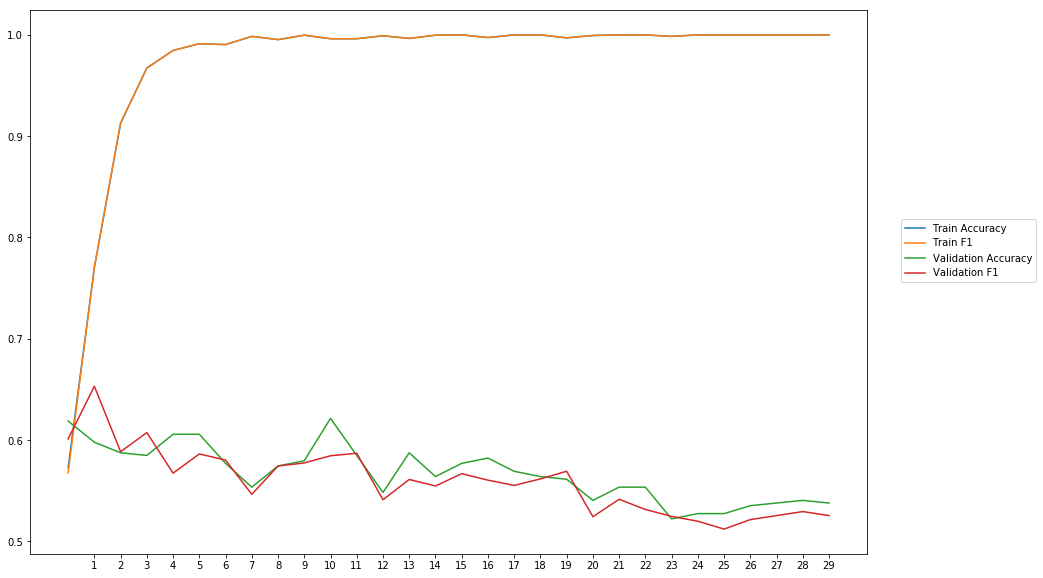

Average Accuracy: 56.74%
Average Precision: 57.20%
Average Recall: 54.93%
Average F1: 55.93%

-----Fold 5--------


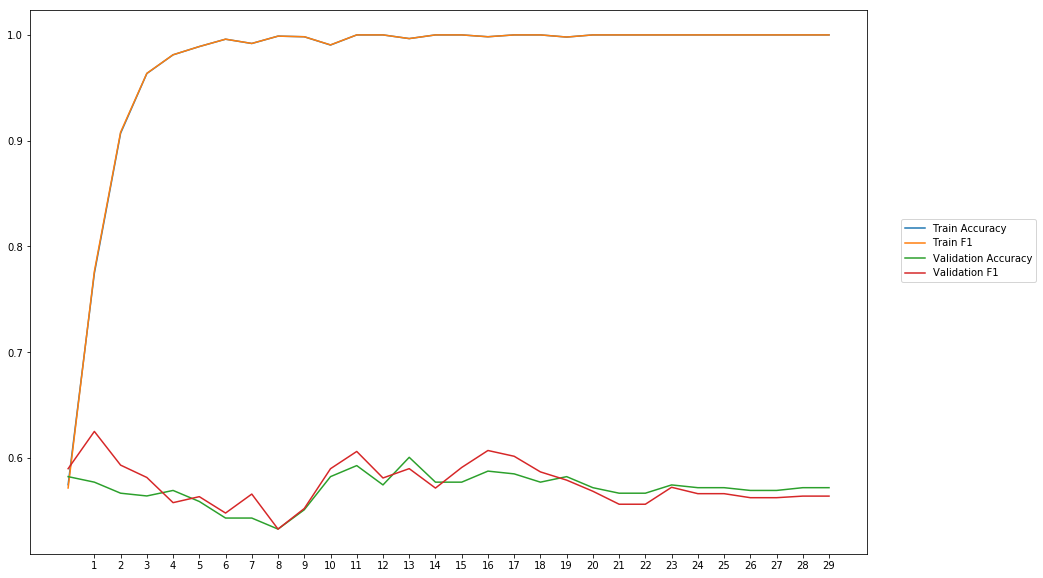

Average Accuracy: 57.09%
Average Precision: 57.12%
Average Recall: 58.00%
Average F1: 57.50%

-----Fold 6--------


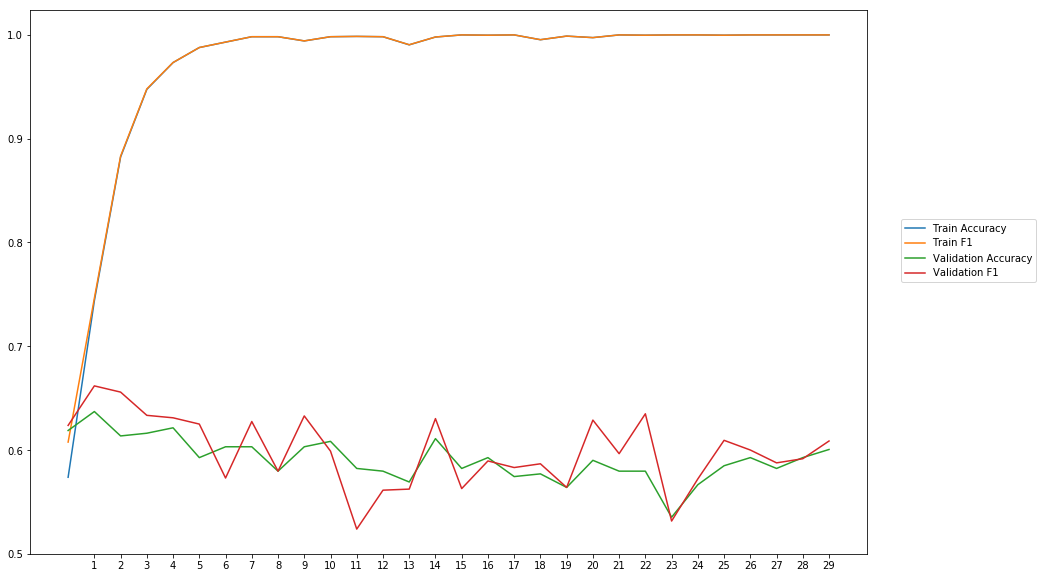

Average Accuracy: 59.11%
Average Precision: 58.90%
Average Recall: 61.28%
Average F1: 59.89%

-----Fold 7--------


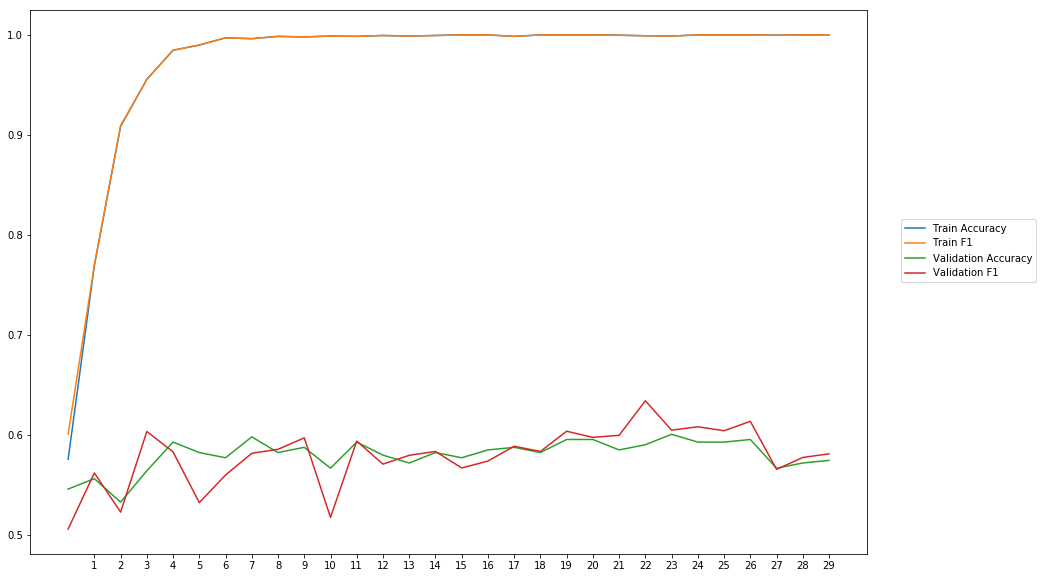

Average Accuracy: 58.01%
Average Precision: 58.18%
Average Recall: 57.93%
Average F1: 57.93%

-----Fold 8--------


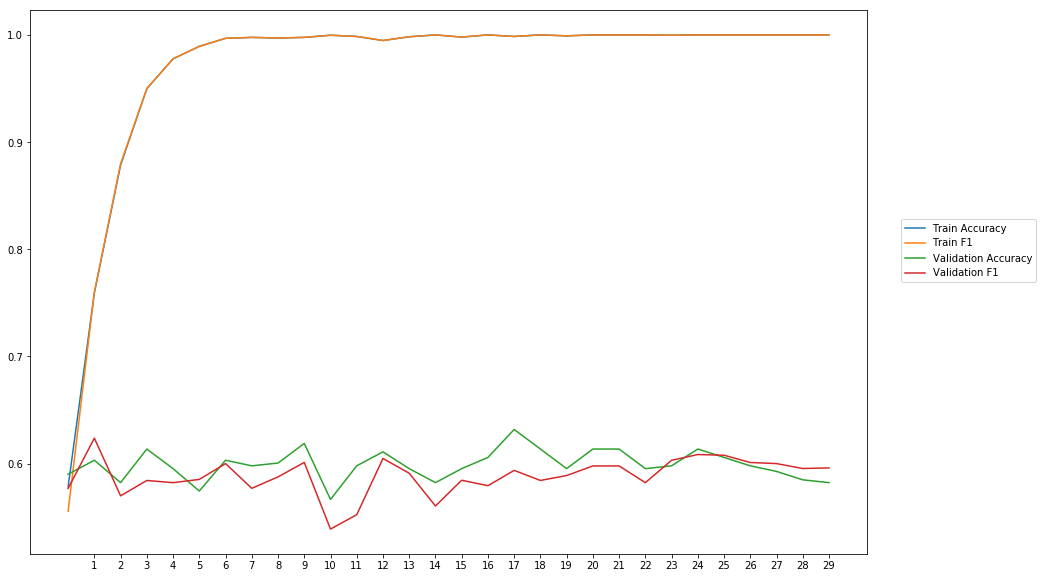

Average Accuracy: 59.90%
Average Precision: 60.69%
Average Recall: 57.29%
Average F1: 58.85%

-----Fold 9--------


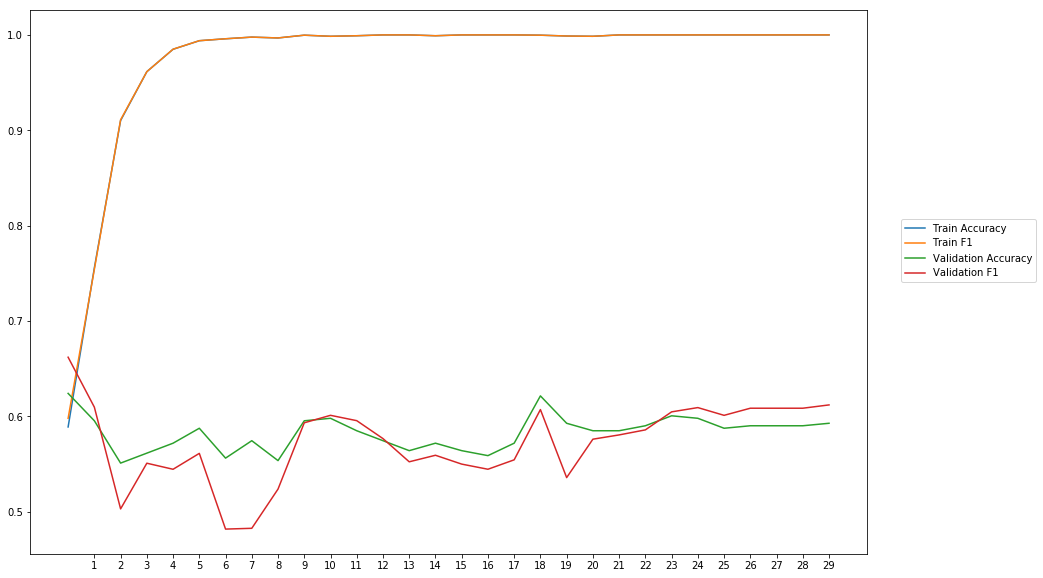

Average Accuracy: 58.27%
Average Precision: 58.76%
Average Recall: 56.34%
Average F1: 57.27%

-----Fold 10--------


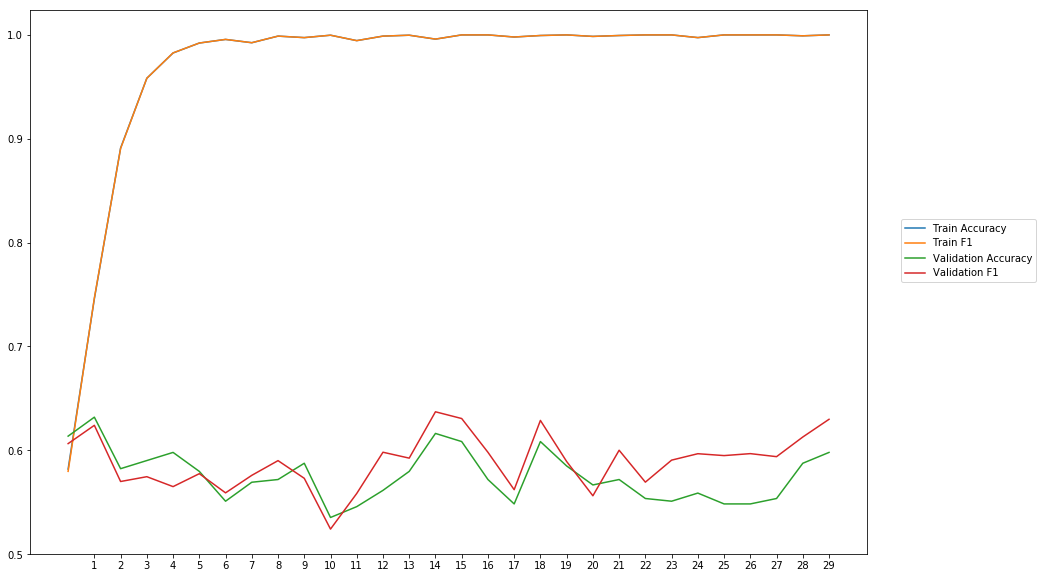

Average Accuracy: 57.57%
Average Precision: 57.37%
Average Recall: 60.83%
Average F1: 58.91%

-------Overallresults-------


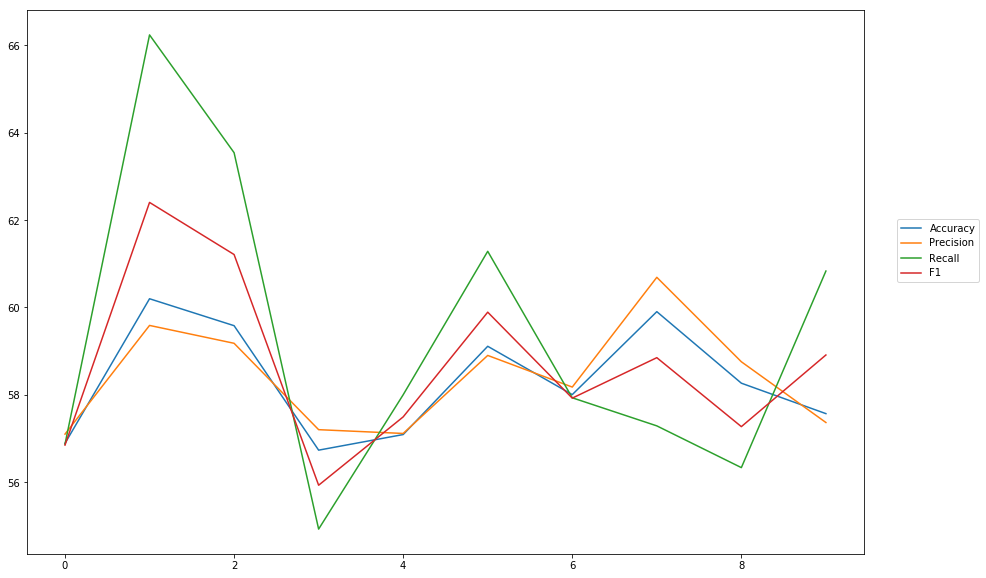

Accuracy: Mean = 58.34% (+/- 1.22%), Max = 60.20%, Min =  56.74%
Precision: Mean = 58.41% (+/- 1.16%), Max = 60.69%, Min =  57.10%
Recall: Mean = 59.33% (+/- 3.37%), Max = 66.23%, Min =  54.93%
F1: Mean = 58.68% (+/- 1.91%), Max = 62.40%, Min =  55.93%


In [9]:
cross_val(model2, NUM_EPOCHS, BATCH_SIZE, optimizer, lossfunction, train_data, train_labels, softmax, outputpath, 'lstm_2_400')  

## LSTM with two LSTM-Layer, first 400 neurons, second 300 neurons

In [8]:
wv_layer3 = Embedding(len(word_index)+1,
                     EMBEDDING_DIM,
                     weights=[embedding_matrix],
                     input_length=MAX_SEQUENCE_LENGTH,
                     trainable=True)

#Input Layer
comment_input3 = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')

#Embedding Layer
embedded_sequences3 = wv_layer3(comment_input3)

#BiLSTM Layer
x3 = LSTM(400, activation='tanh', return_sequences=True)(embedded_sequences3)

x3 = LSTM(300, activation='tanh')(x3)

#Output (Dense) Layer
preds3 = Dense(2, activation='softmax')(x3)

# build the model
model3 = Model(inputs=[comment_input3], outputs=preds3)


-----Fold 1--------


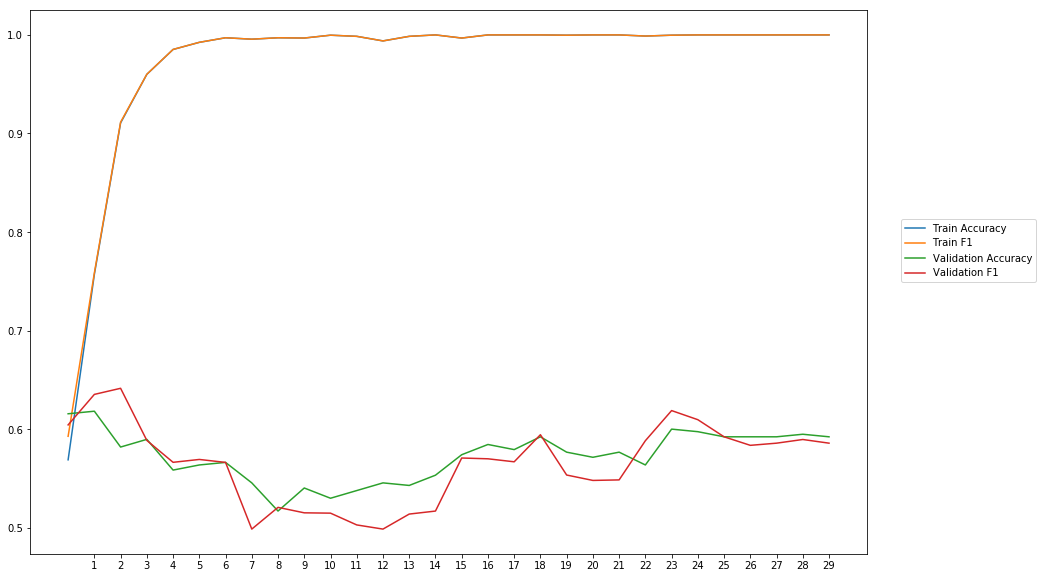

Average Accuracy: 57.28%
Average Precision: 57.61%
Average Recall: 55.77%
Average F1: 56.52%

-----Fold 2--------


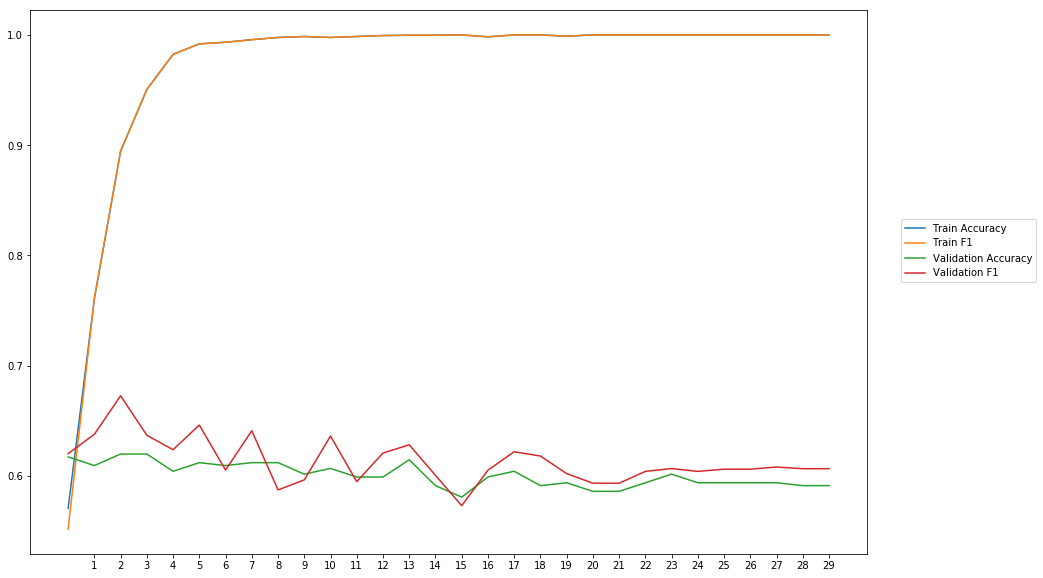

Average Accuracy: 60.07%
Average Precision: 59.74%
Average Recall: 63.21%
Average F1: 61.34%

-----Fold 3--------


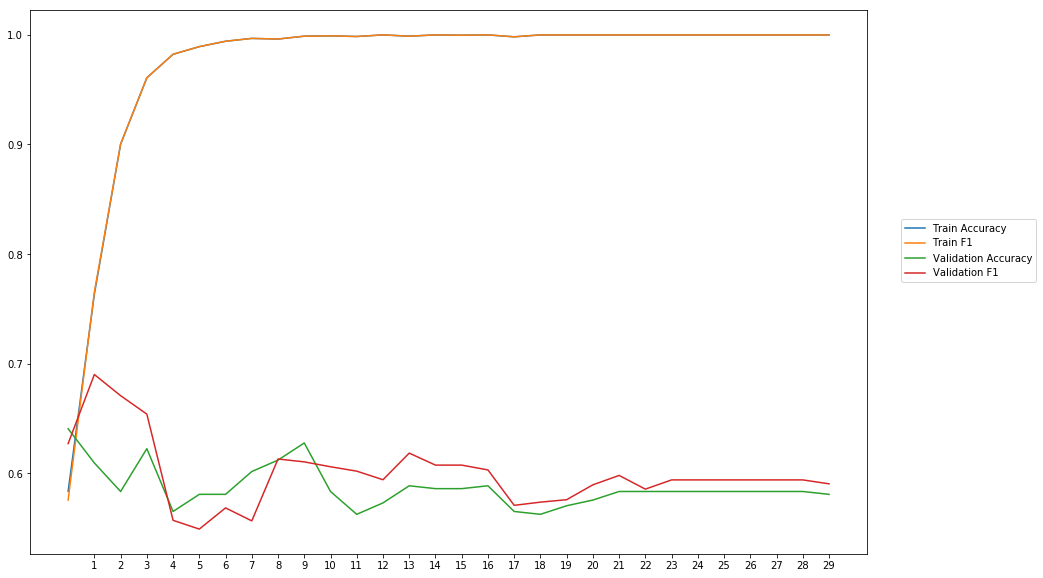

Average Accuracy: 58.71%
Average Precision: 58.59%
Average Recall: 61.92%
Average F1: 59.94%

-----Fold 4--------


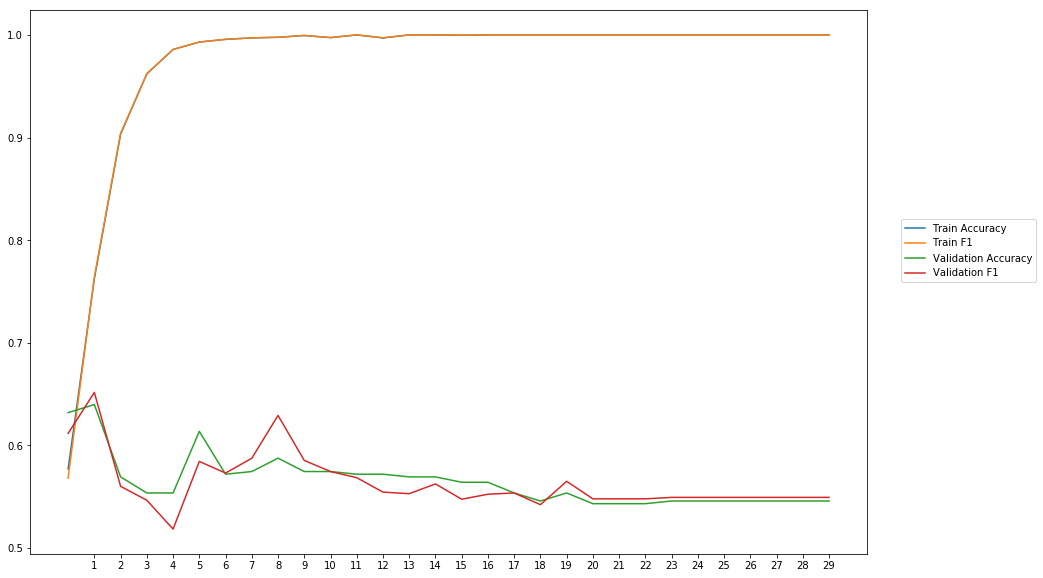

Average Accuracy: 56.52%
Average Precision: 56.76%
Average Recall: 56.09%
Average F1: 56.36%

-----Fold 5--------


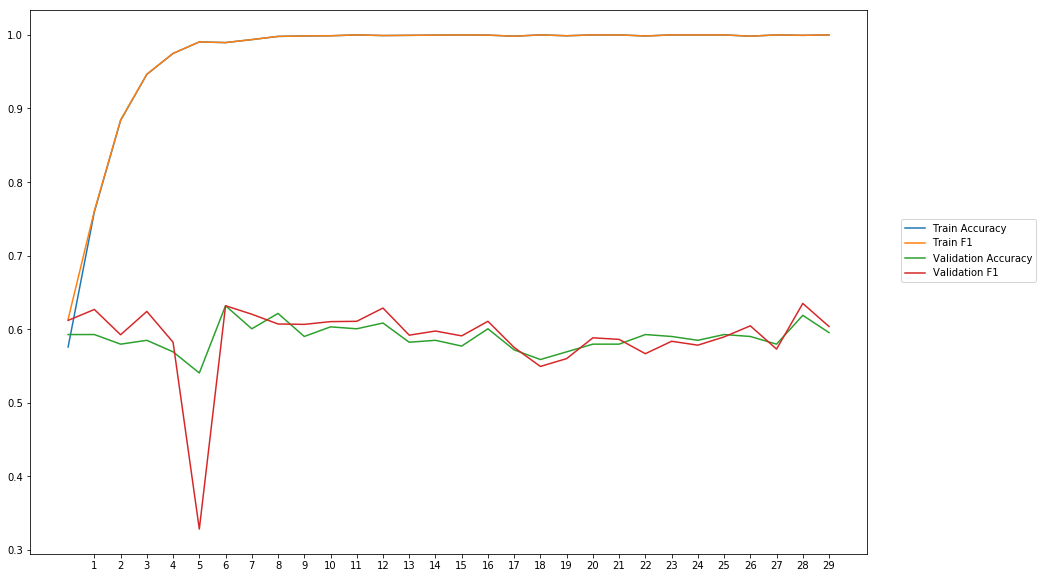

Average Accuracy: 58.88%
Average Precision: 58.97%
Average Recall: 59.57%
Average F1: 58.88%

-----Fold 6--------


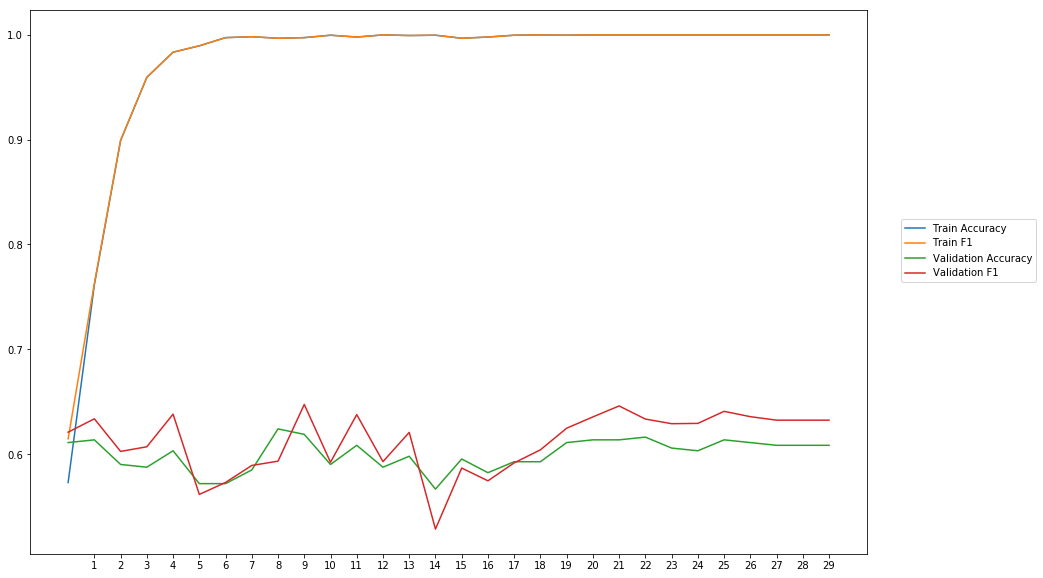

Average Accuracy: 60.01%
Average Precision: 59.52%
Average Recall: 63.26%
Average F1: 61.22%

-----Fold 7--------


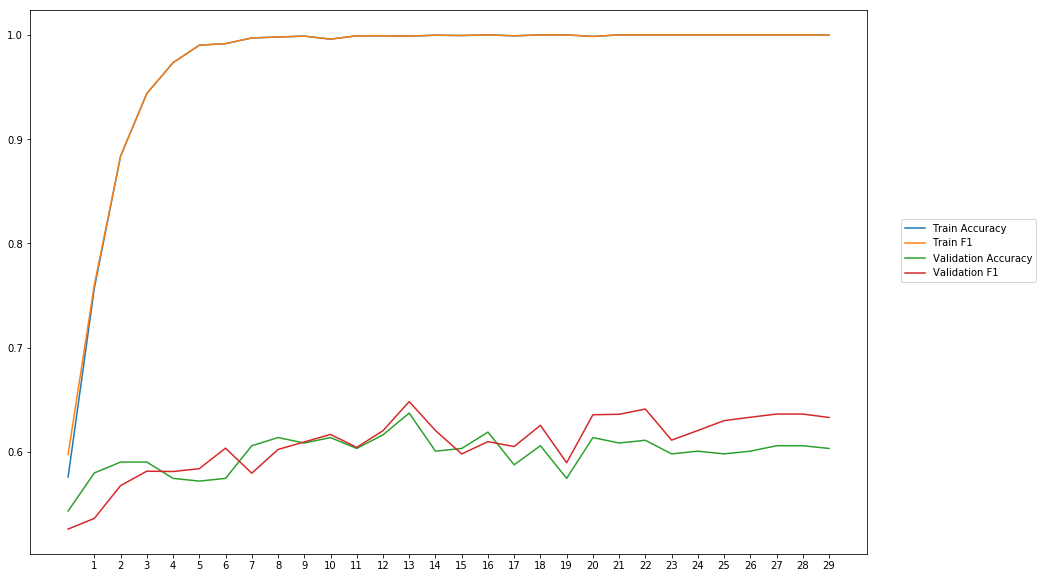

Average Accuracy: 59.85%
Average Precision: 59.58%
Average Recall: 62.20%
Average F1: 60.73%

-----Fold 8--------


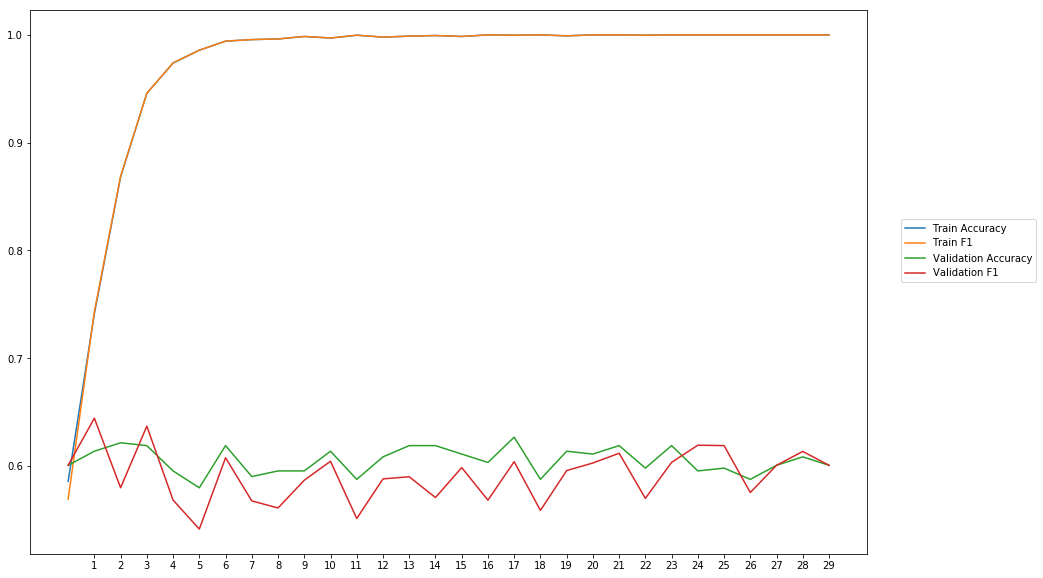

Average Accuracy: 60.51%
Average Precision: 61.50%
Average Recall: 57.20%
Average F1: 59.12%

-----Fold 9--------


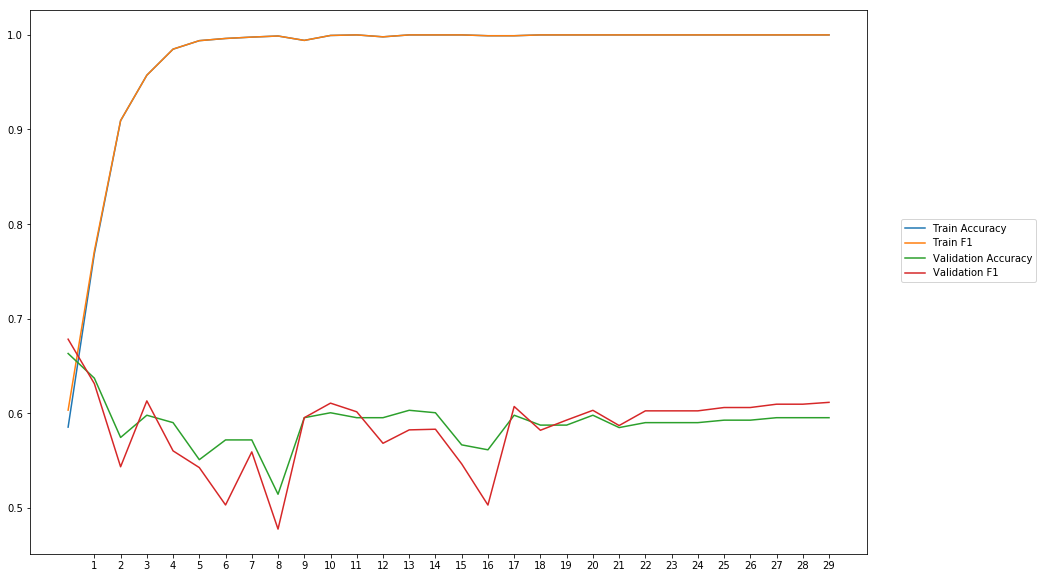

Average Accuracy: 58.96%
Average Precision: 59.25%
Average Recall: 57.88%
Average F1: 58.41%

-----Fold 10--------


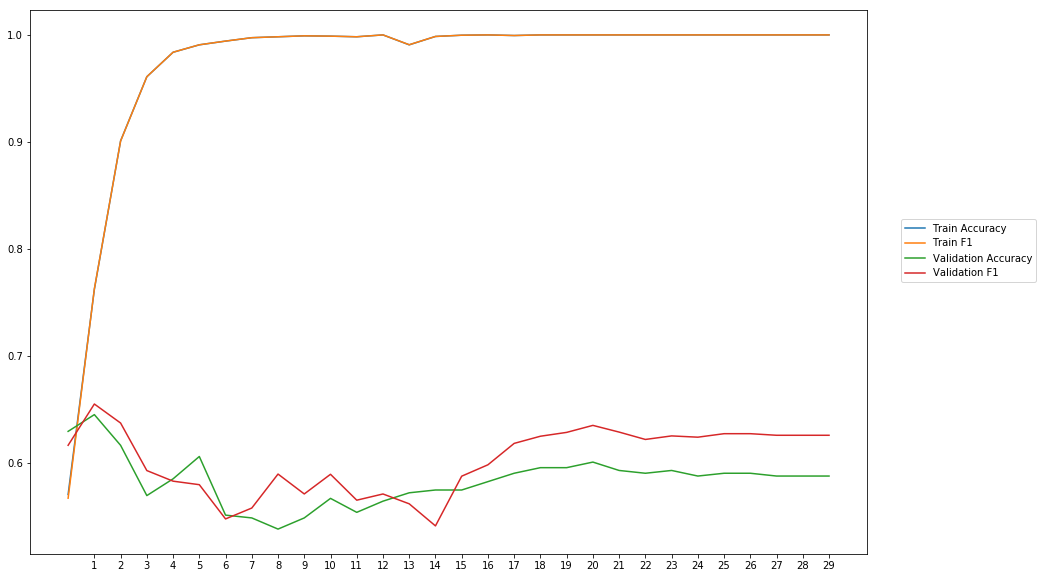

Average Accuracy: 58.36%
Average Precision: 57.82%
Average Recall: 63.21%
Average F1: 60.25%

-------Overallresults-------


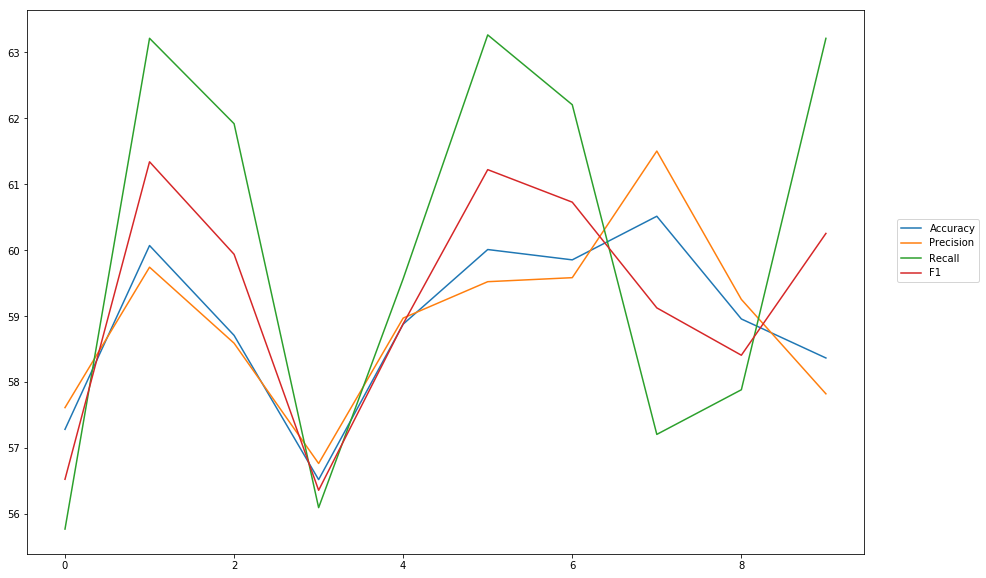

Accuracy: Mean = 58.91% (+/- 1.21%), Max = 60.51%, Min =  56.52%
Precision: Mean = 58.94% (+/- 1.26%), Max = 61.50%, Min =  56.76%
Recall: Mean = 60.03% (+/- 2.92%), Max = 63.26%, Min =  55.77%
F1: Mean = 59.28% (+/- 1.69%), Max = 61.34%, Min =  56.36%


In [10]:
cross_val(model3, NUM_EPOCHS, BATCH_SIZE, optimizer, lossfunction, train_data, train_labels, softmax, outputpath, 'lstm_2_400_300')  

## LSTM with three LSTM-layer, 400 neurons each

In [ ]:
wv_layer4 = Embedding(len(word_index)+1,
                     EMBEDDING_DIM,
                     weights=[embedding_matrix],
                     input_length=MAX_SEQUENCE_LENGTH,
                     trainable=True)

#Input Layer
comment_input4 = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')

#Embedding Layer
embedded_sequences4 = wv_layer4(comment_input4)

#LSTM Layer
x4 = LSTM(400, activation='tanh', return_sequences=True)(embedded_sequences4)

x4 = LSTM(400, activation='tanh', return_sequences=True)(x4)

x4 = LSTM(400, activation='tanh')(x4)

#Output (Dense) Layer
preds4 = Dense(2, activation='softmax')(x4)

# build the model
model4 = Model(inputs=[comment_input4], outputs=preds4)


-----Fold 1--------


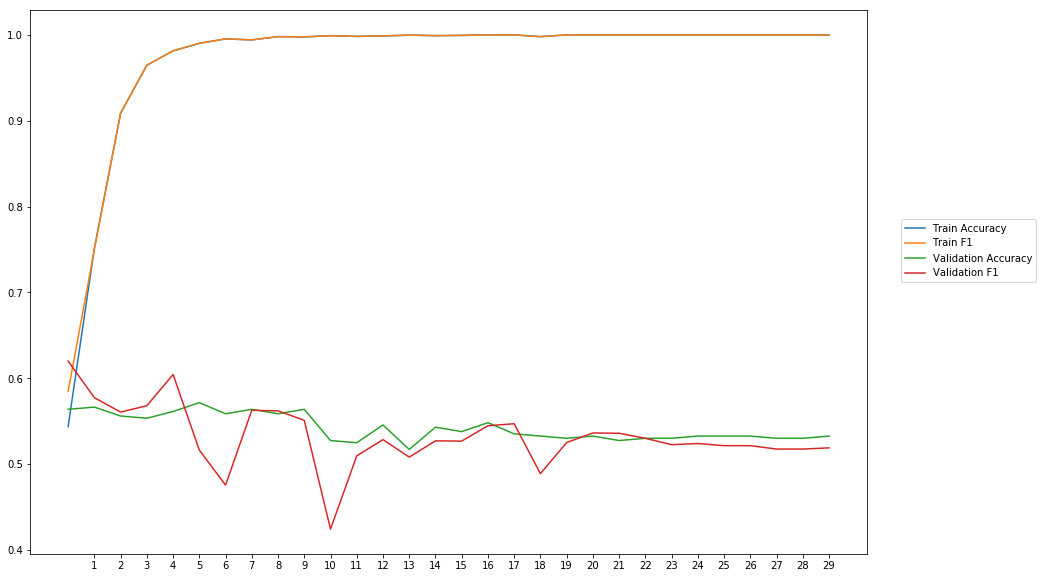

Average Accuracy: 54.22%
Average Precision: 54.57%
Average Recall: 52.40%
Average F1: 53.23%

-----Fold 2--------


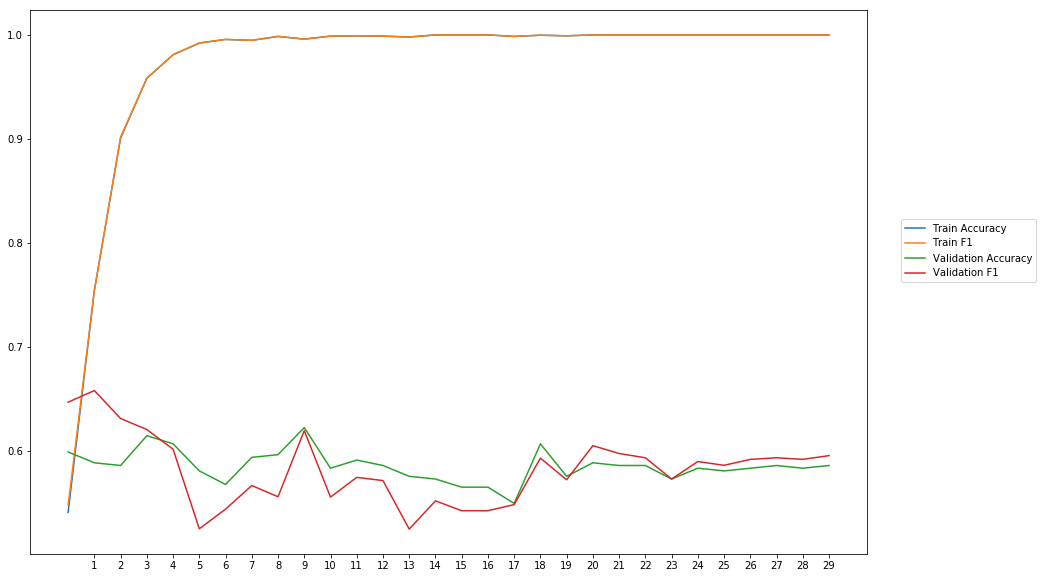

Average Accuracy: 58.54%
Average Precision: 59.02%
Average Recall: 57.91%
Average F1: 58.21%

-----Fold 3--------


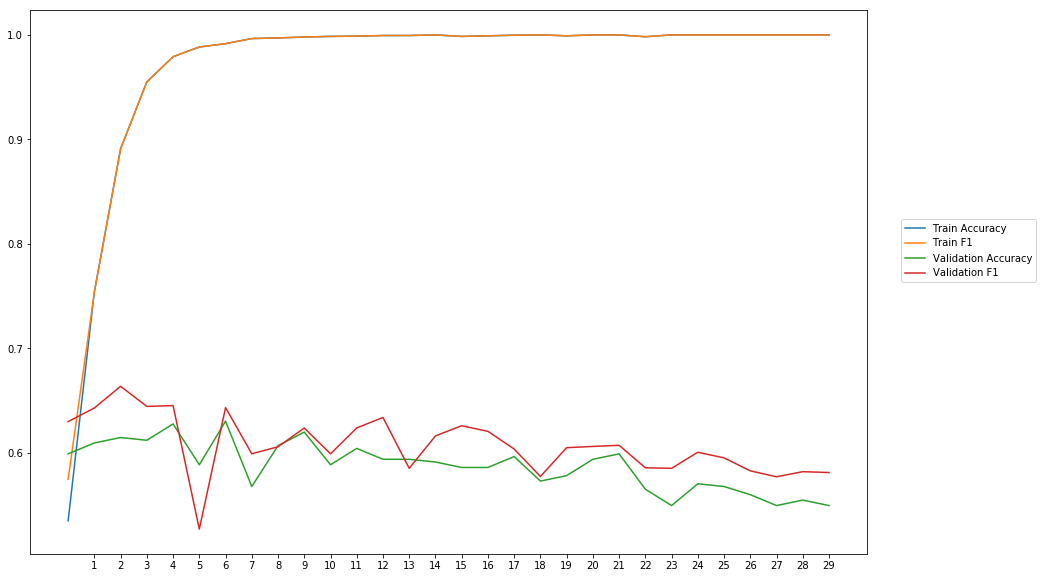

Average Accuracy: 58.75%
Average Precision: 58.30%
Average Recall: 63.66%
Average F1: 60.72%

-----Fold 4--------


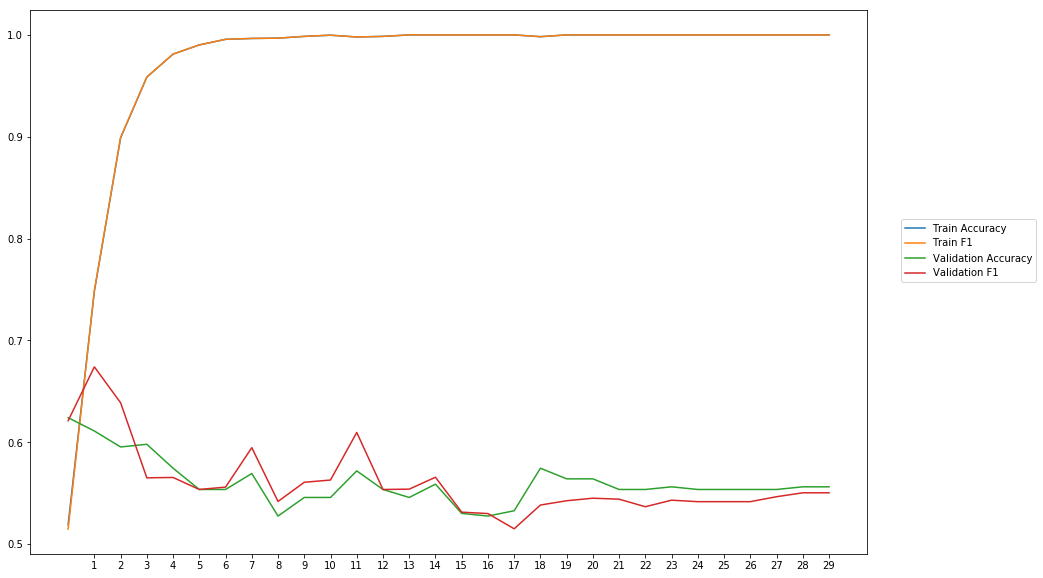

Average Accuracy: 56.03%
Average Precision: 56.16%
Average Recall: 56.25%
Average F1: 56.04%

-----Fold 5--------


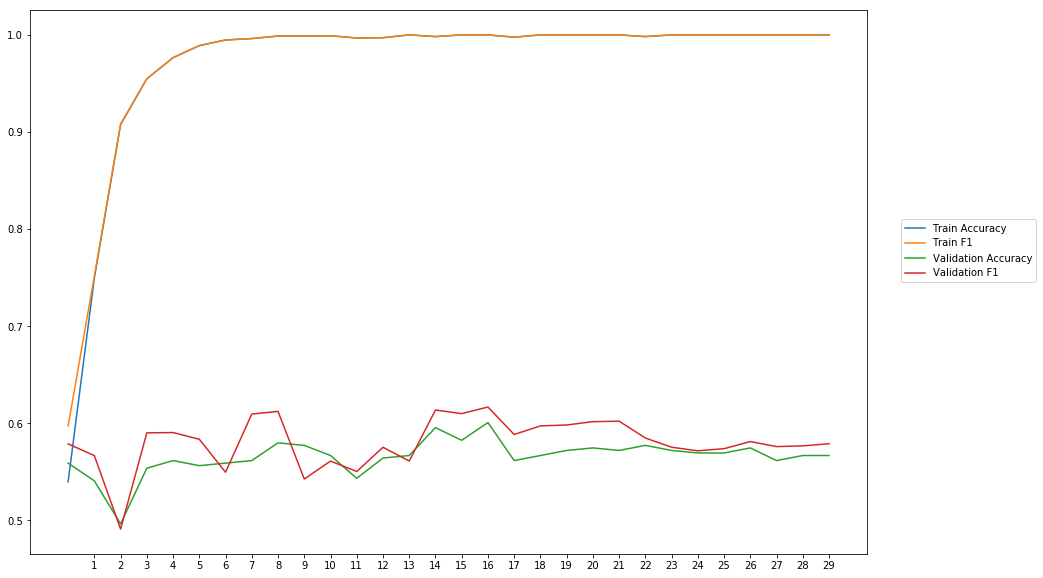

Average Accuracy: 56.54%
Average Precision: 56.26%
Average Recall: 60.05%
Average F1: 58.01%

-----Fold 6--------


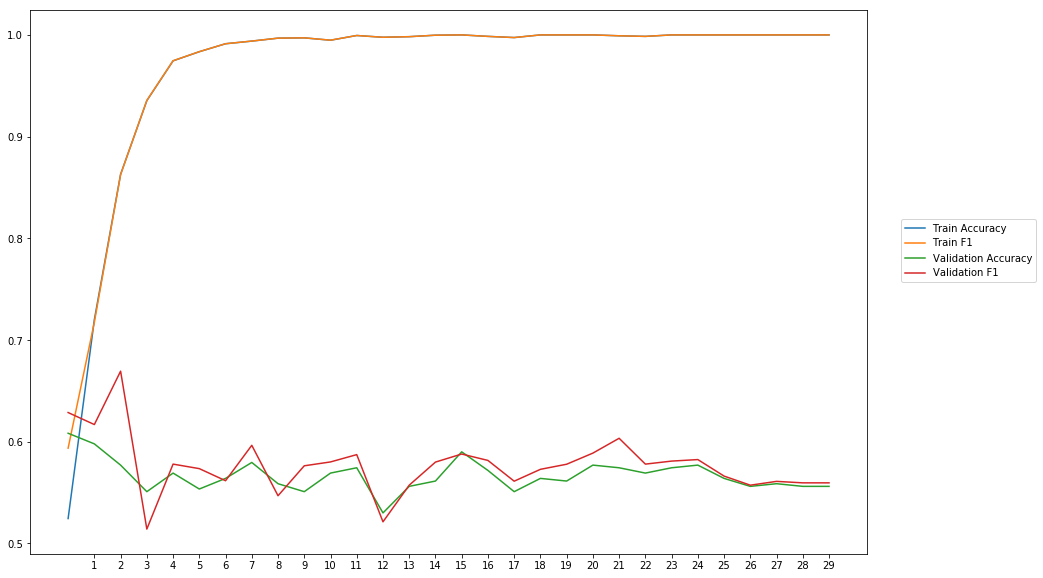

Average Accuracy: 56.68%
Average Precision: 56.48%
Average Recall: 59.24%
Average F1: 57.69%

-----Fold 7--------


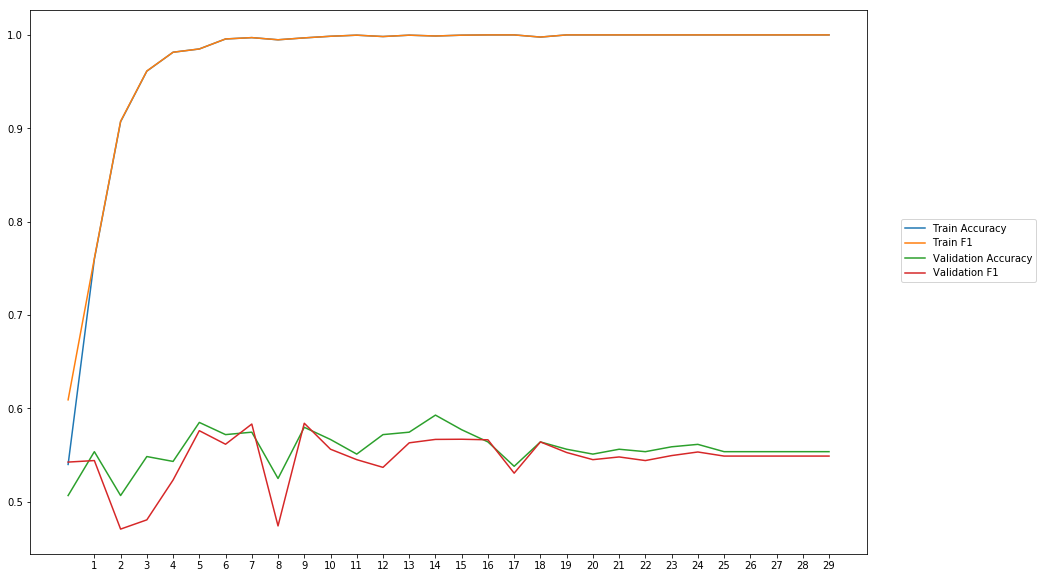

Average Accuracy: 55.66%
Average Precision: 56.10%
Average Recall: 53.26%
Average F1: 54.57%

-----Fold 8--------


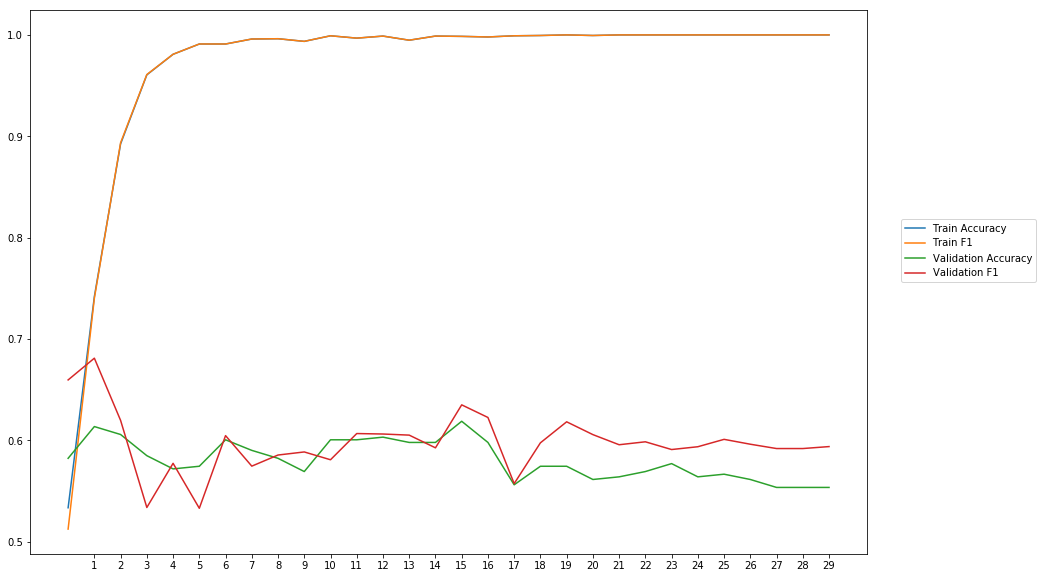

Average Accuracy: 58.07%
Average Precision: 57.69%
Average Recall: 62.62%
Average F1: 59.80%

-----Fold 9--------


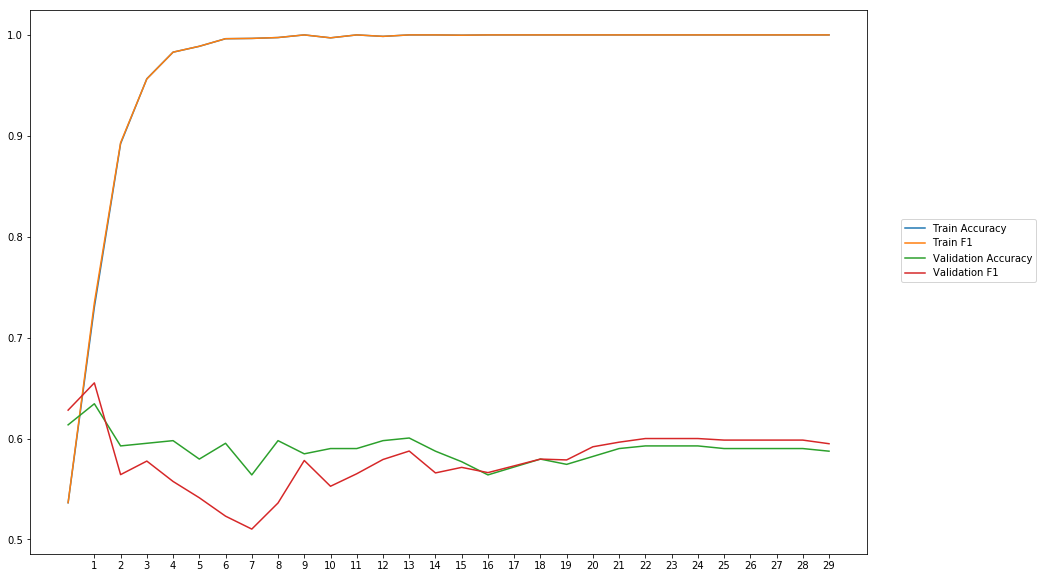

Average Accuracy: 58.96%
Average Precision: 59.64%
Average Recall: 56.61%
Average F1: 57.89%

-----Fold 10--------


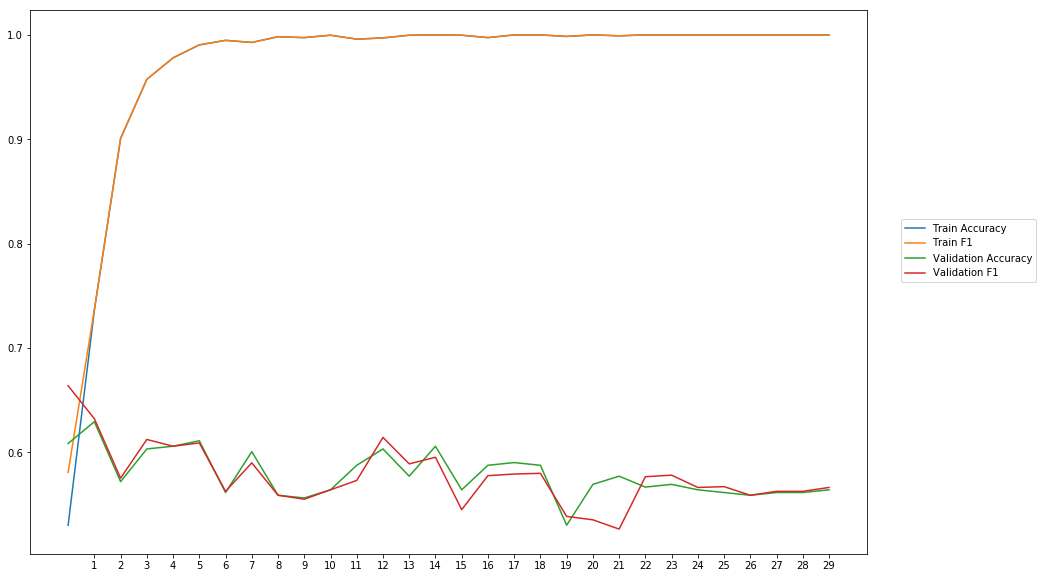

Average Accuracy: 57.85%
Average Precision: 58.05%
Average Recall: 57.60%
Average F1: 57.73%

-------Overallresults-------


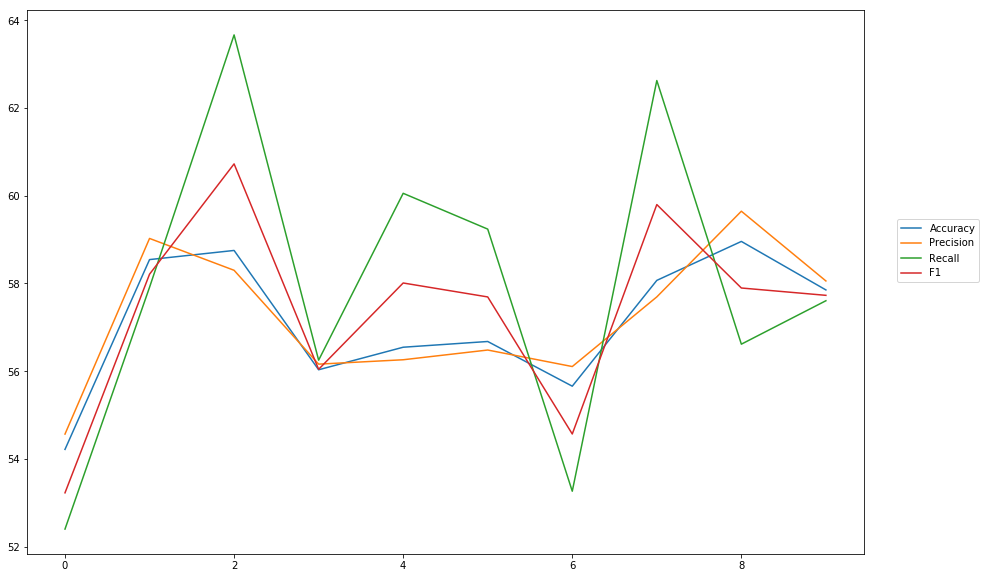

Accuracy: Mean = 57.13% (+/- 1.48%), Max = 58.96%, Min =  54.22%
Precision: Mean = 57.23% (+/- 1.49%), Max = 59.64%, Min =  54.57%
Recall: Mean = 57.96% (+/- 3.44%), Max = 63.66%, Min =  52.40%
F1: Mean = 57.39% (+/- 2.13%), Max = 60.72%, Min =  53.23%


In [13]:
cross_val(model4, NUM_EPOCHS, BATCH_SIZE, optimizer, lossfunction, train_data, train_labels, softmax, outputpath, 'lstm_3_400')  

## LSTM with three LSTM-Layer, first 400, second 300, third 200 neurons

In [8]:
wv_layer5 = Embedding(len(word_index)+1,
                     EMBEDDING_DIM,
                     weights=[embedding_matrix],
                     input_length=MAX_SEQUENCE_LENGTH,
                     trainable=True)

#Input Layer
comment_input5 = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')

#Embedding Layer
embedded_sequences5 = wv_layer5(comment_input5)

#LSTM Layer
x5 = LSTM(400, activation='tanh', return_sequences=True)(embedded_sequences5)

x5 = LSTM(300, activation='tanh', return_sequences=True)(x5)

x5 = LSTM(200, activation='tanh')(x5)

#Output (Dense) Layer
preds5 = Dense(2, activation='softmax')(x5)

# build the model
model5 = Model(inputs=[comment_input5], outputs=preds5)


-----Fold 1--------


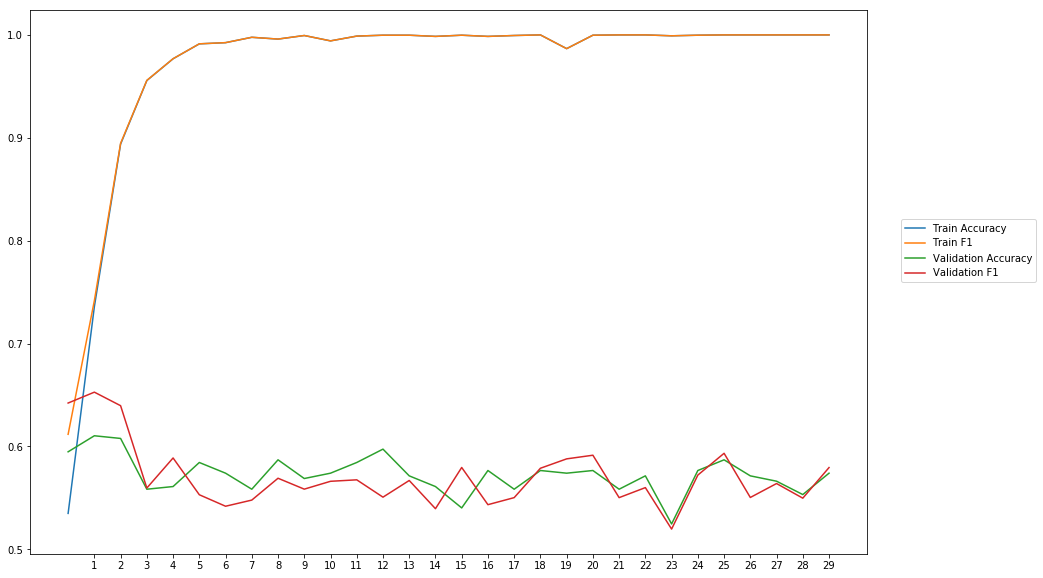

Average Accuracy: 57.26%
Average Precision: 57.51%
Average Recall: 56.94%
Average F1: 57.05%

-----Fold 2--------


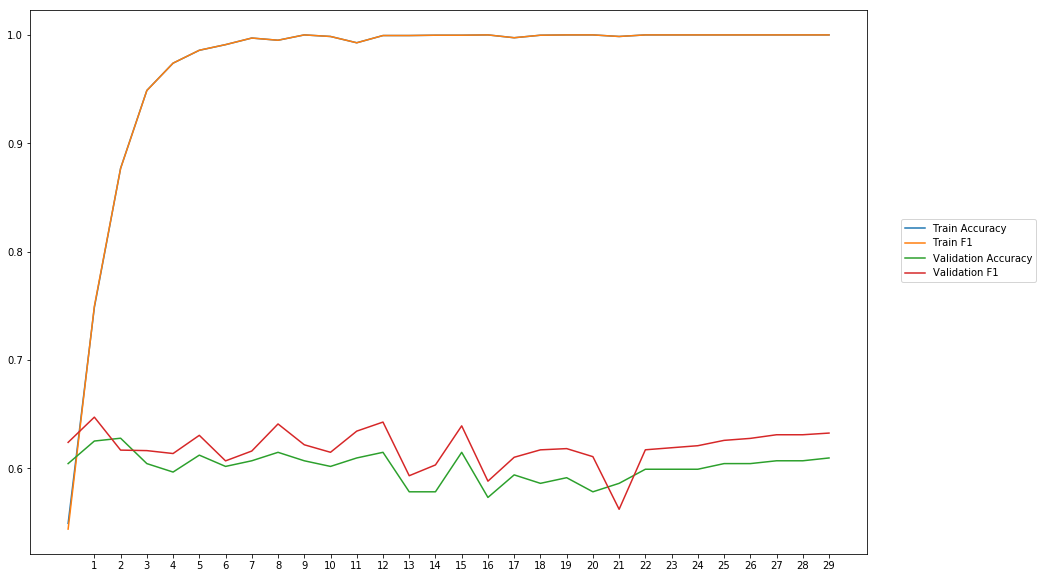

Average Accuracy: 60.10%
Average Precision: 59.54%
Average Recall: 64.54%
Average F1: 61.89%

-----Fold 3--------


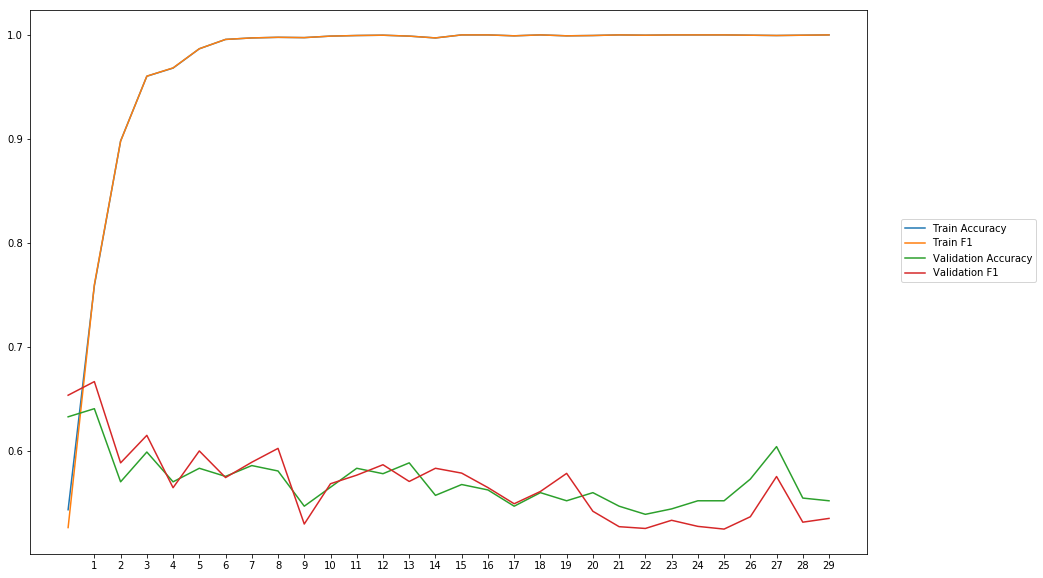

Average Accuracy: 57.08%
Average Precision: 57.39%
Average Recall: 56.58%
Average F1: 56.87%

-----Fold 4--------


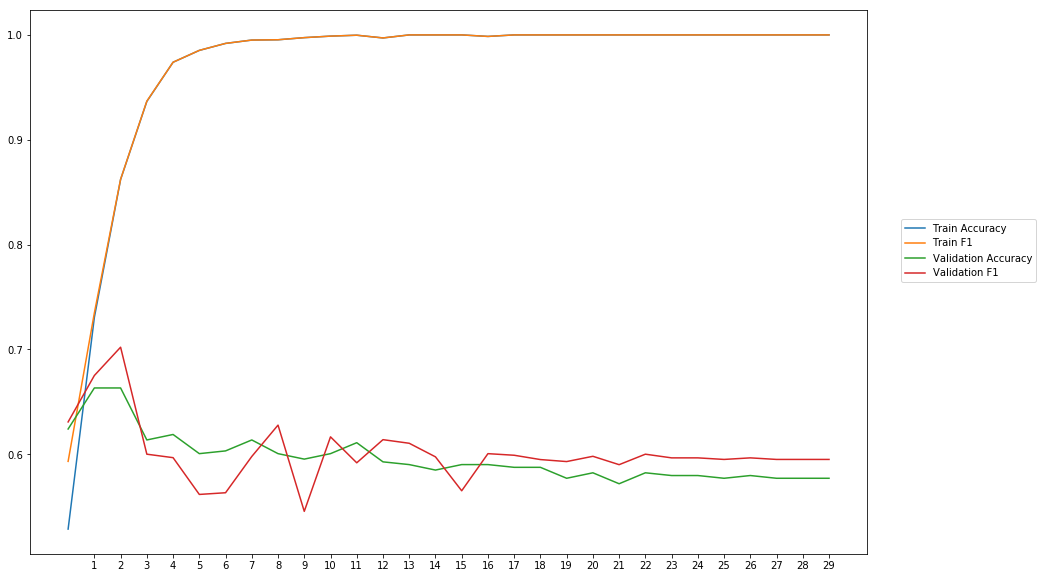

Average Accuracy: 59.63%
Average Precision: 59.64%
Average Recall: 61.01%
Average F1: 60.13%

-----Fold 5--------


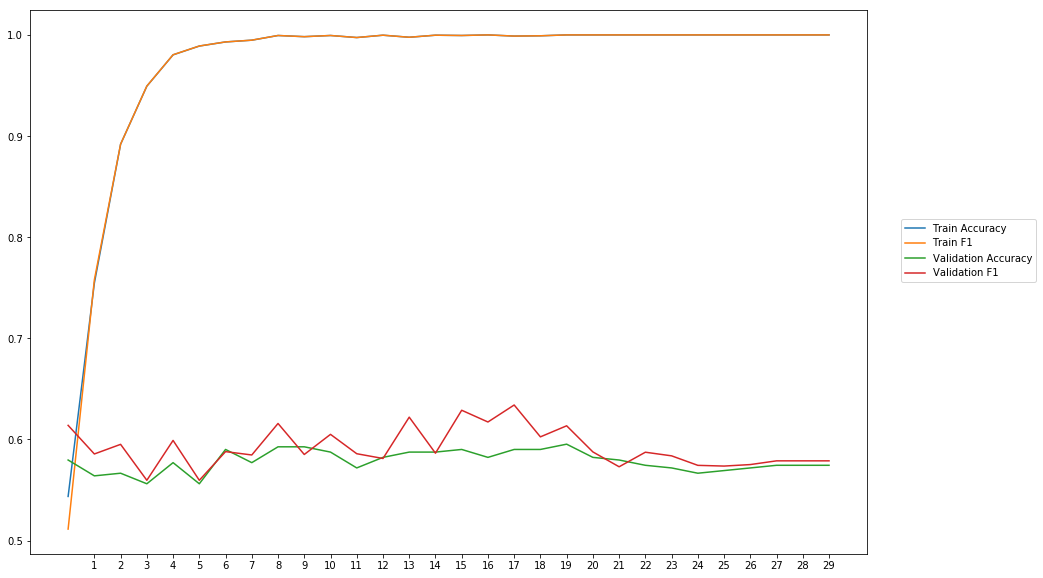

Average Accuracy: 57.85%
Average Precision: 57.51%
Average Recall: 61.09%
Average F1: 59.18%

-----Fold 6--------


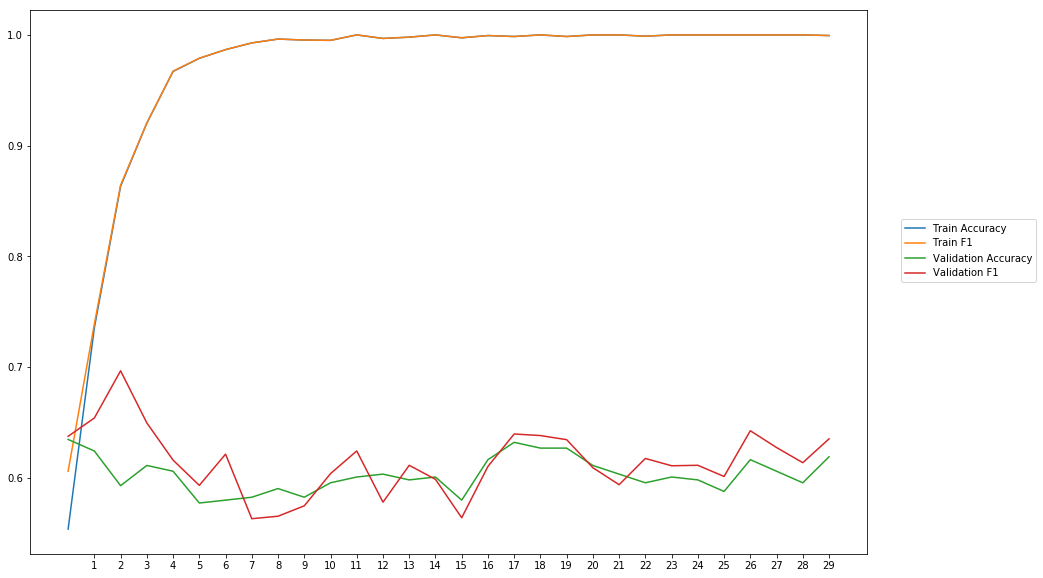

Average Accuracy: 60.30%
Average Precision: 59.92%
Average Recall: 63.52%
Average F1: 61.43%

-----Fold 7--------


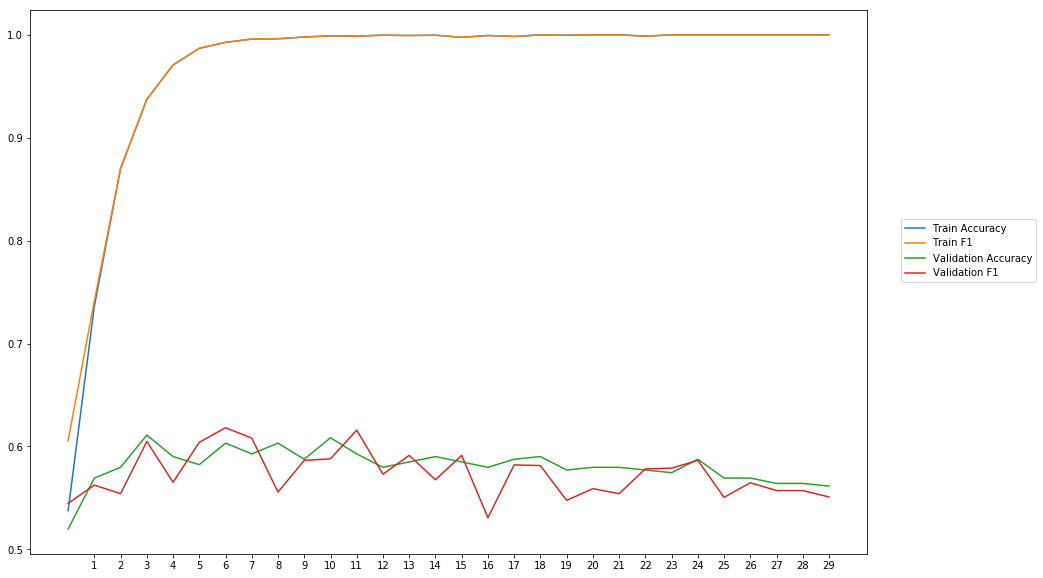

Average Accuracy: 58.13%
Average Precision: 58.67%
Average Recall: 56.32%
Average F1: 57.36%

-----Fold 8--------


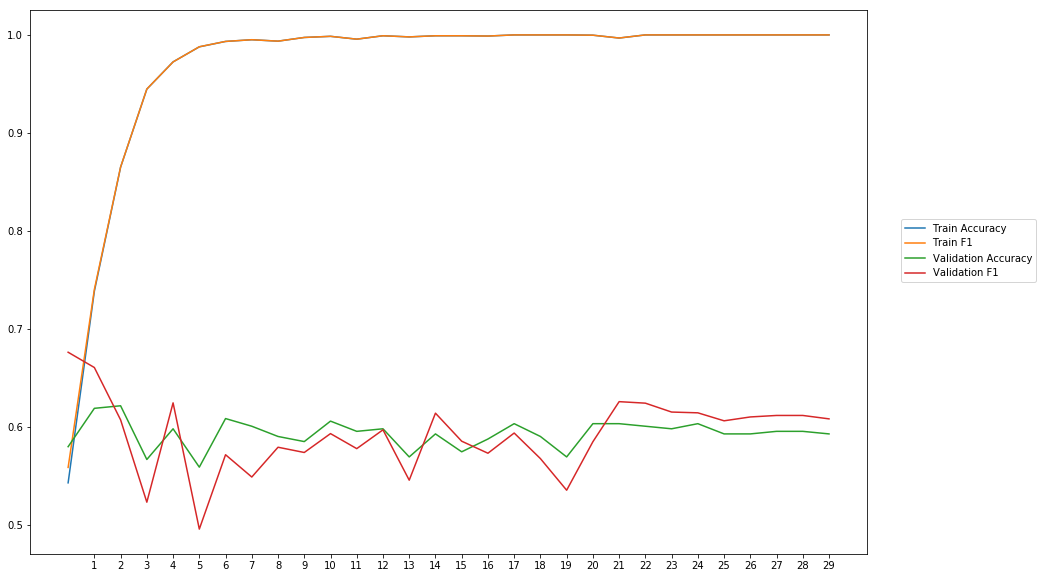

Average Accuracy: 59.30%
Average Precision: 59.54%
Average Recall: 59.50%
Average F1: 59.17%

-----Fold 9--------


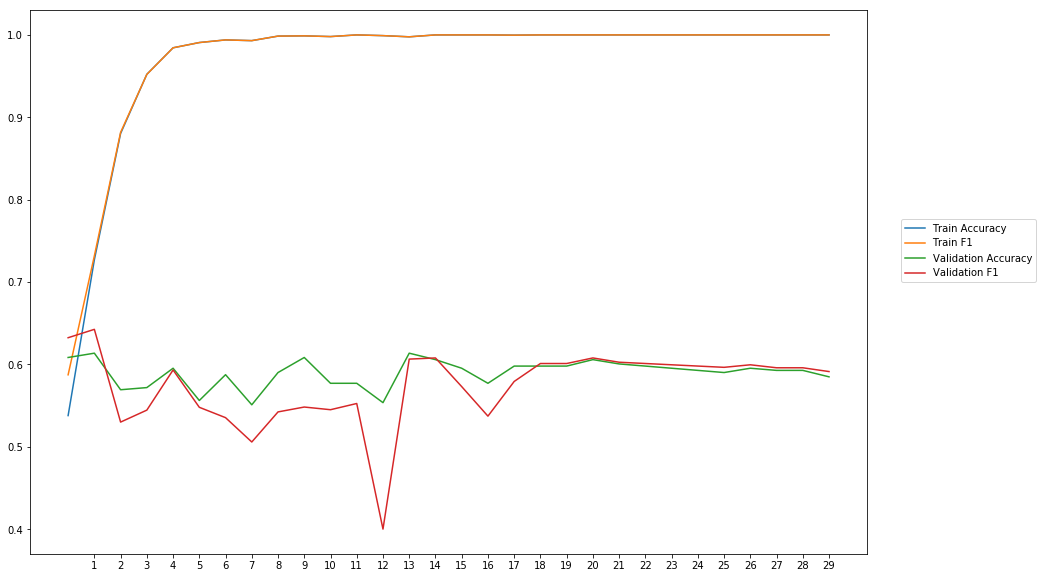

Average Accuracy: 58.97%
Average Precision: 59.80%
Average Recall: 55.75%
Average F1: 57.38%

-----Fold 10--------


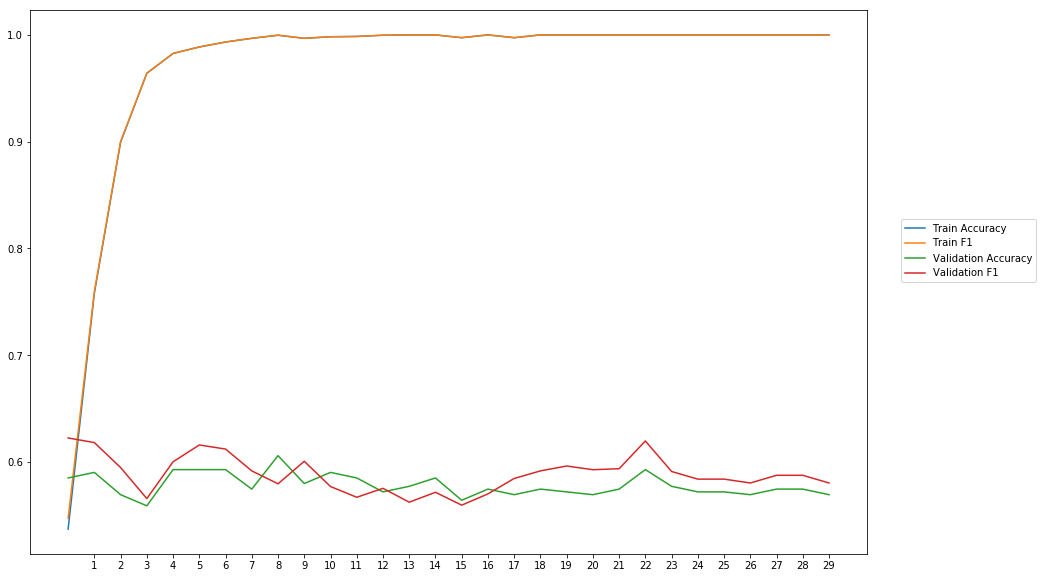

Average Accuracy: 57.82%
Average Precision: 57.64%
Average Recall: 60.26%
Average F1: 58.84%

-------Overallresults-------


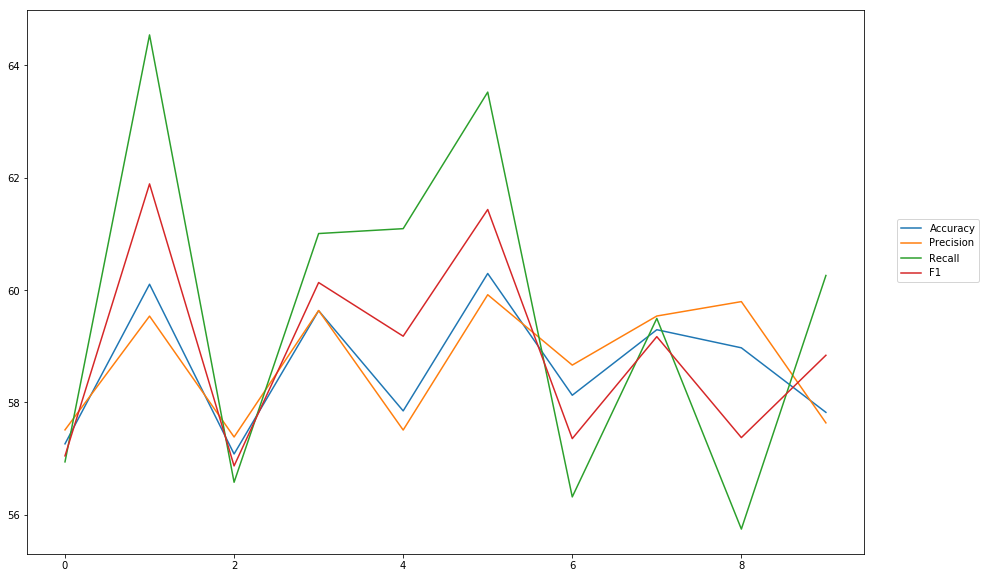

Accuracy: Mean = 58.65% (+/- 1.11%), Max = 60.30%, Min =  57.08%
Precision: Mean = 58.71% (+/- 1.03%), Max = 59.92%, Min =  57.39%
Recall: Mean = 59.55% (+/- 2.94%), Max = 64.54%, Min =  55.75%
F1: Mean = 58.93% (+/- 1.71%), Max = 61.89%, Min =  56.87%


In [14]:
cross_val(model5, NUM_EPOCHS, BATCH_SIZE, optimizer, lossfunction, train_data, train_labels, softmax, outputpath, 'lstm_3_400_300_200')  

## LSTM one LSTM-layer, 500 neurons

In [ ]:
wv_layer6 = Embedding(len(word_index)+1,
                     EMBEDDING_DIM,
                     weights=[embedding_matrix],
                     input_length=MAX_SEQUENCE_LENGTH,
                     trainable=True)

#Input Layer
comment_input6 = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')

#Embedding Layer
embedded_sequences6 = wv_layer6(comment_input6)

#LSTM Layer
x6 = LSTM(500, activation='tanh')(embedded_sequences6)

#Output (Dense) Layer
preds6 = Dense(2, activation='softmax')(x6)

# build the model
model6 = Model(inputs=[comment_input6], outputs=preds6)

Instructions for updating:
Use tf.cast instead.

-----Fold 1--------


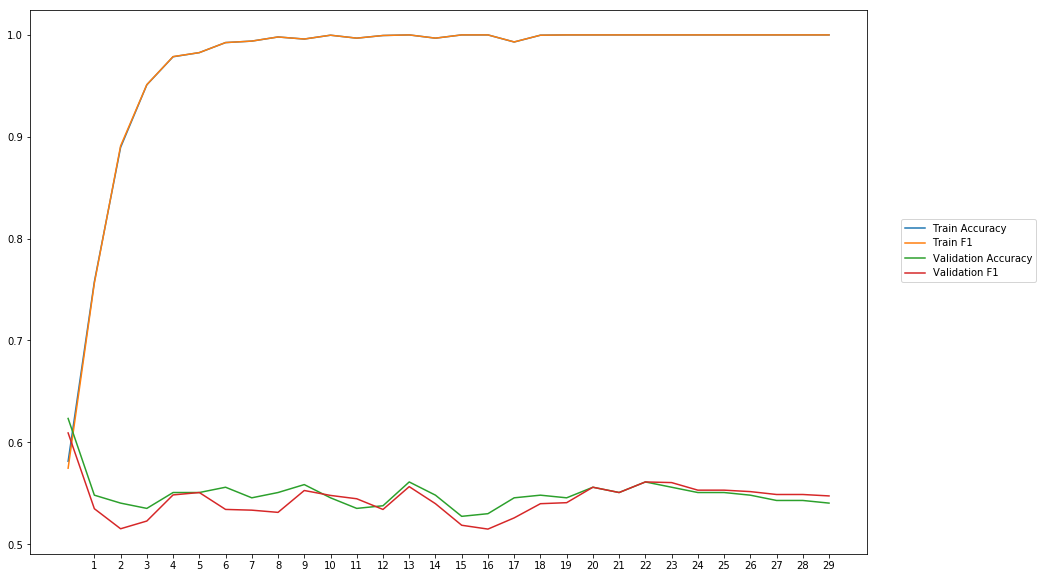

Average Accuracy: 54.94%
Average Precision: 55.21%
Average Recall: 53.68%
Average F1: 54.41%

-----Fold 2--------


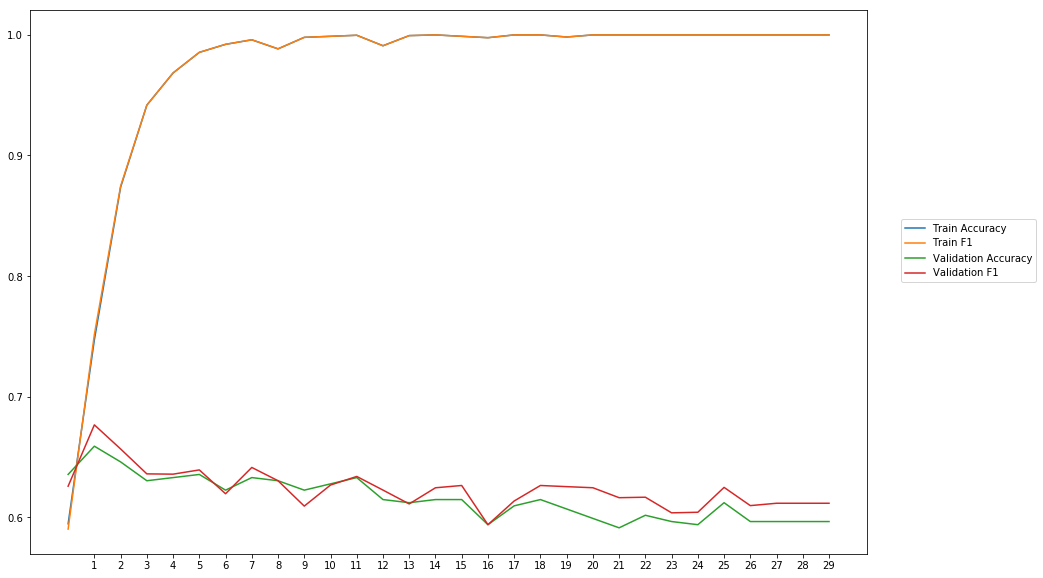

Average Accuracy: 61.55%
Average Precision: 61.44%
Average Recall: 63.37%
Average F1: 62.35%

-----Fold 3--------


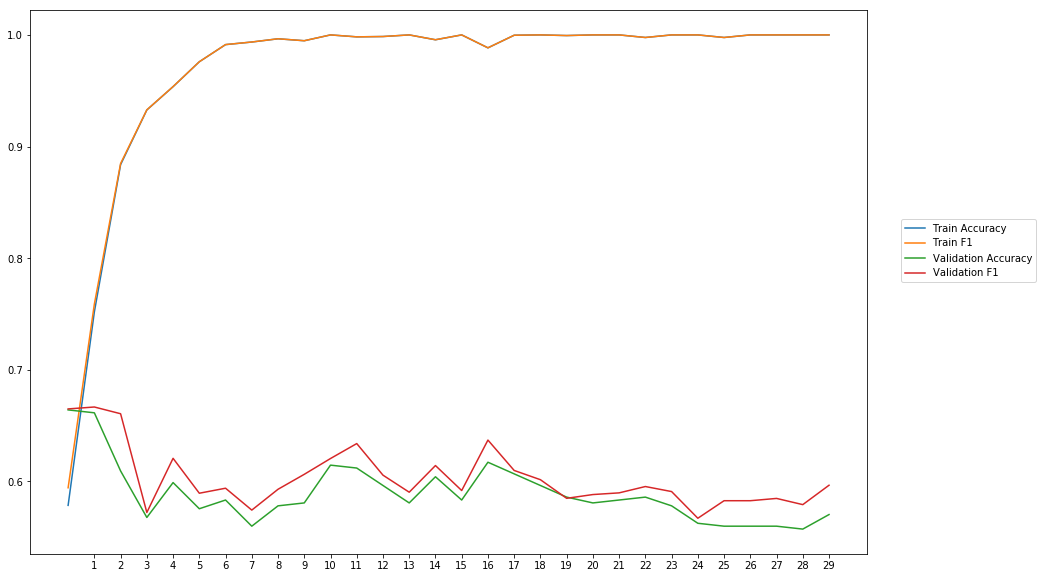

Average Accuracy: 58.91%
Average Precision: 58.66%
Average Recall: 62.12%
Average F1: 60.30%

-----Fold 4--------


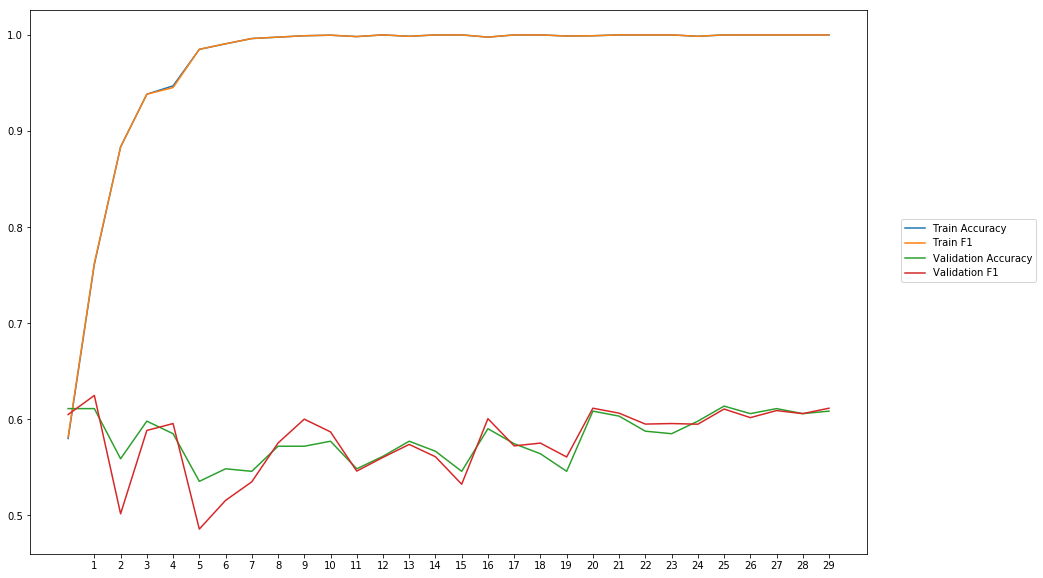

Average Accuracy: 58.04%
Average Precision: 58.23%
Average Recall: 57.50%
Average F1: 57.78%

-----Fold 5--------


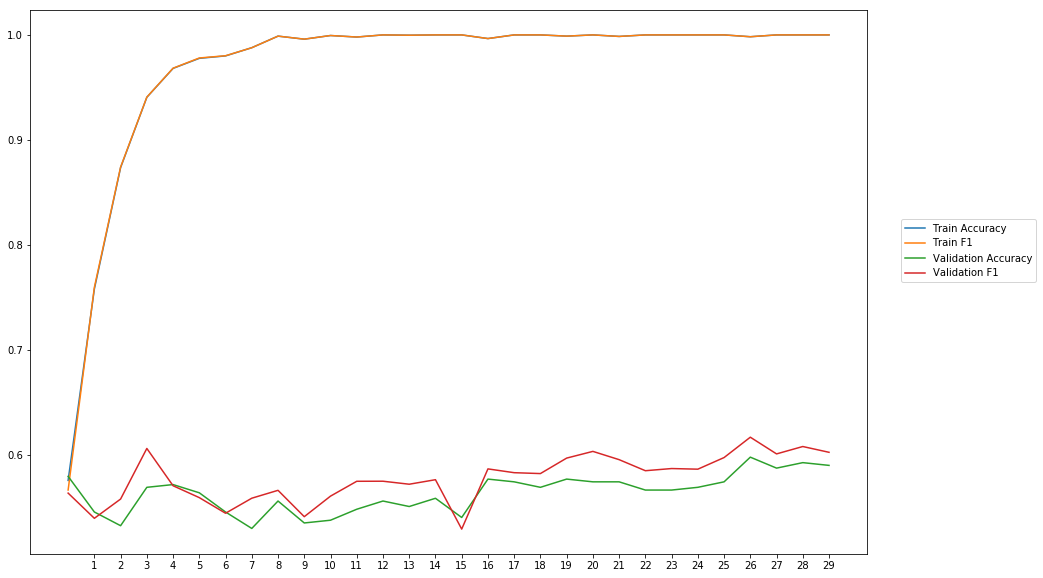

Average Accuracy: 56.38%
Average Precision: 56.13%
Average Recall: 59.60%
Average F1: 57.77%

-----Fold 6--------


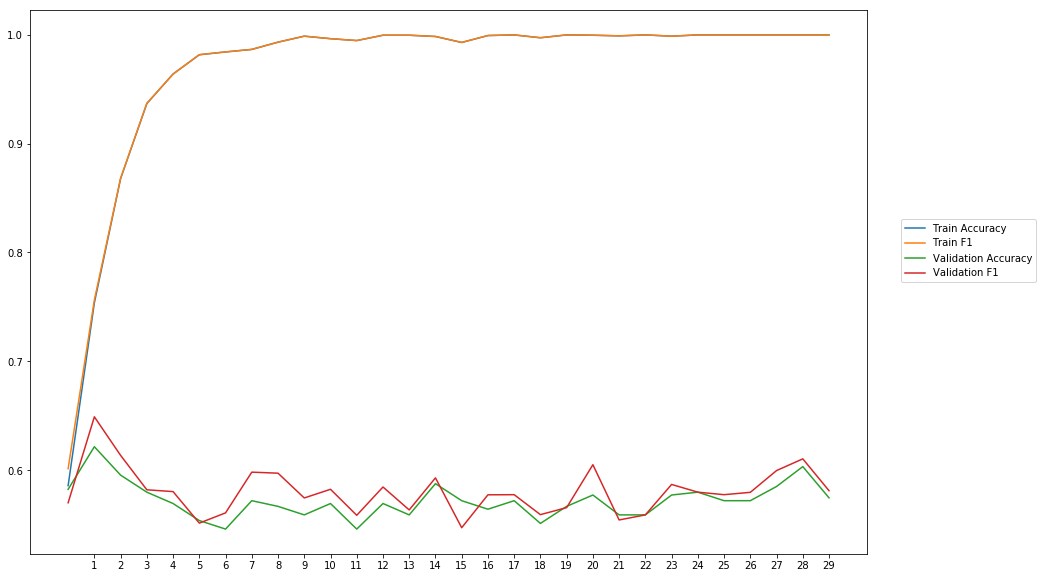

Average Accuracy: 57.19%
Average Precision: 57.04%
Average Recall: 59.18%
Average F1: 58.05%

-----Fold 7--------


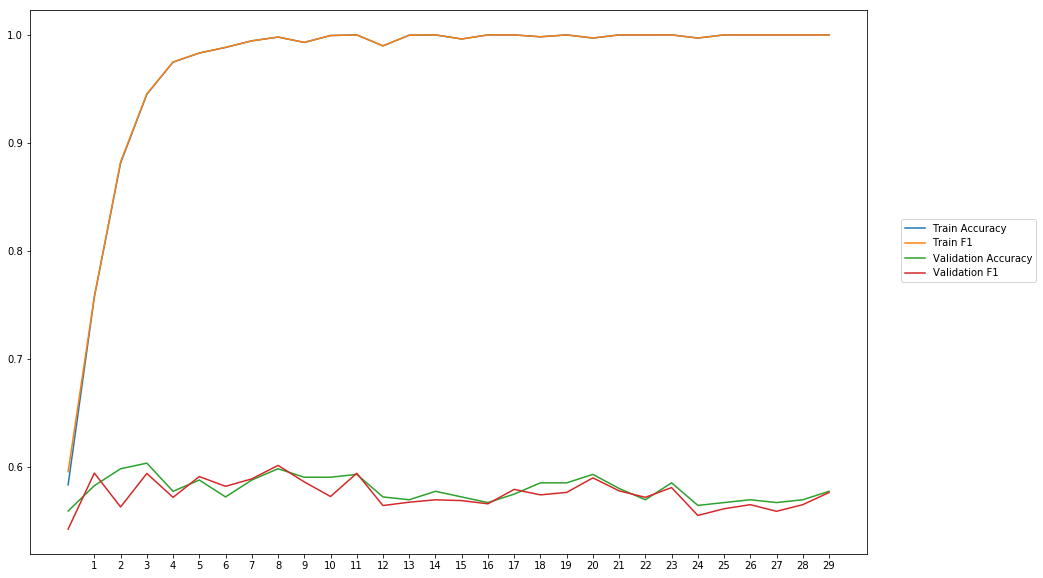

Average Accuracy: 57.92%
Average Precision: 58.27%
Average Recall: 56.72%
Average F1: 57.46%

-----Fold 8--------


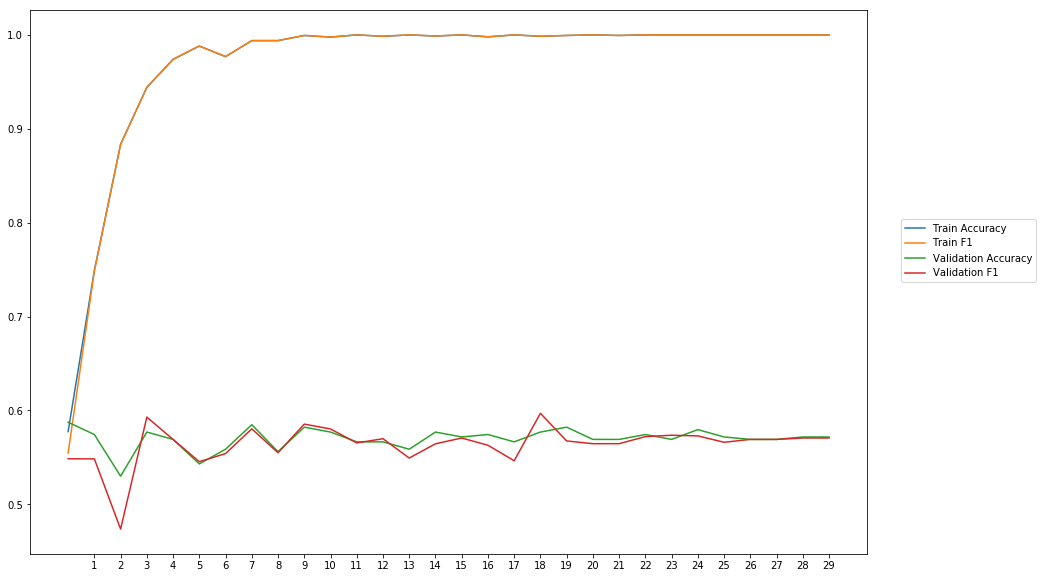

Average Accuracy: 56.99%
Average Precision: 57.33%
Average Recall: 55.62%
Average F1: 56.41%

-----Fold 9--------


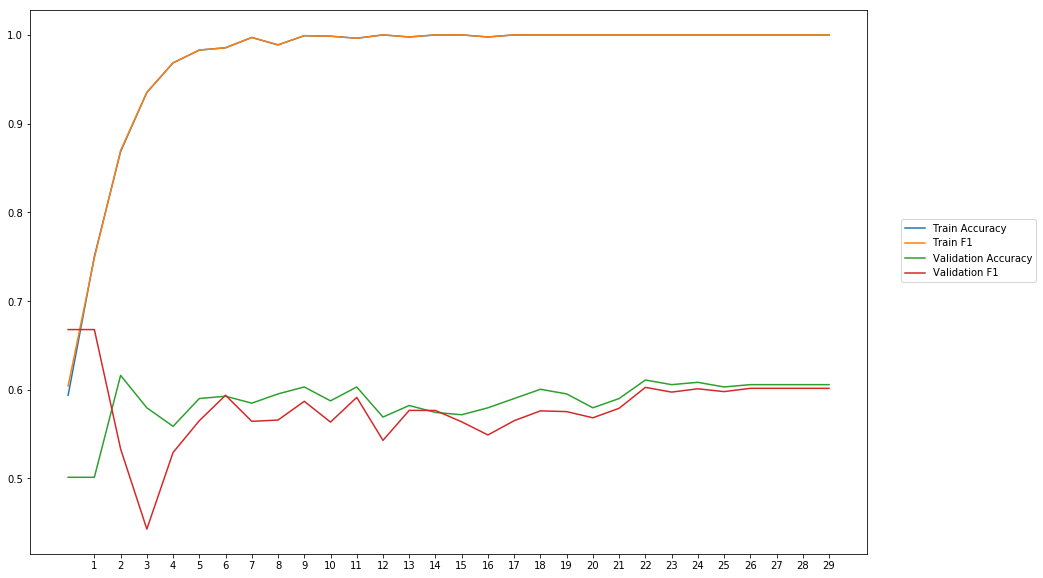

Average Accuracy: 58.66%
Average Precision: 59.84%
Average Recall: 57.66%
Average F1: 57.84%

-----Fold 10--------


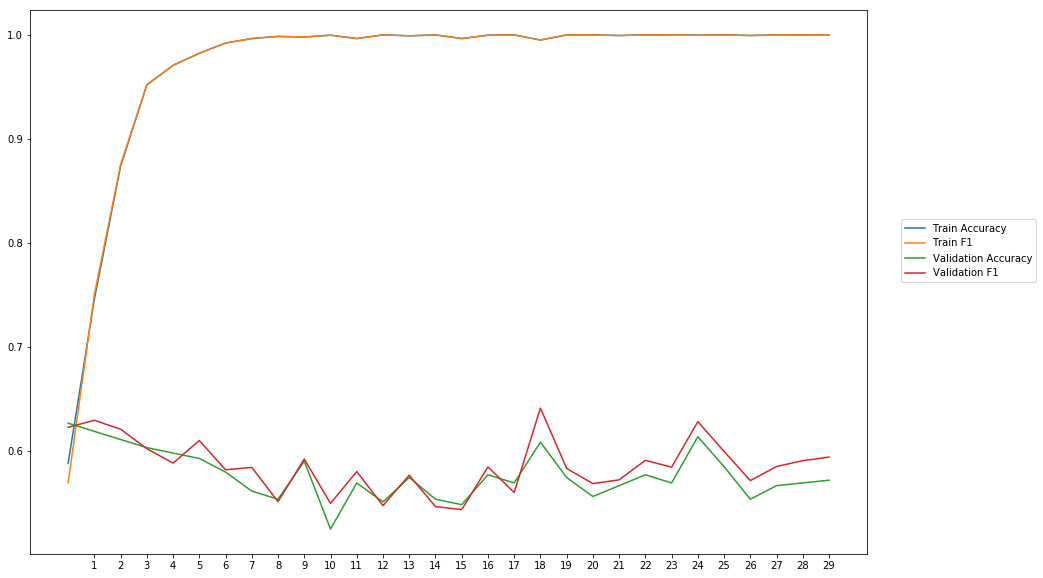

Average Accuracy: 57.71%
Average Precision: 57.55%
Average Recall: 59.77%
Average F1: 58.60%

-------Overallresults-------


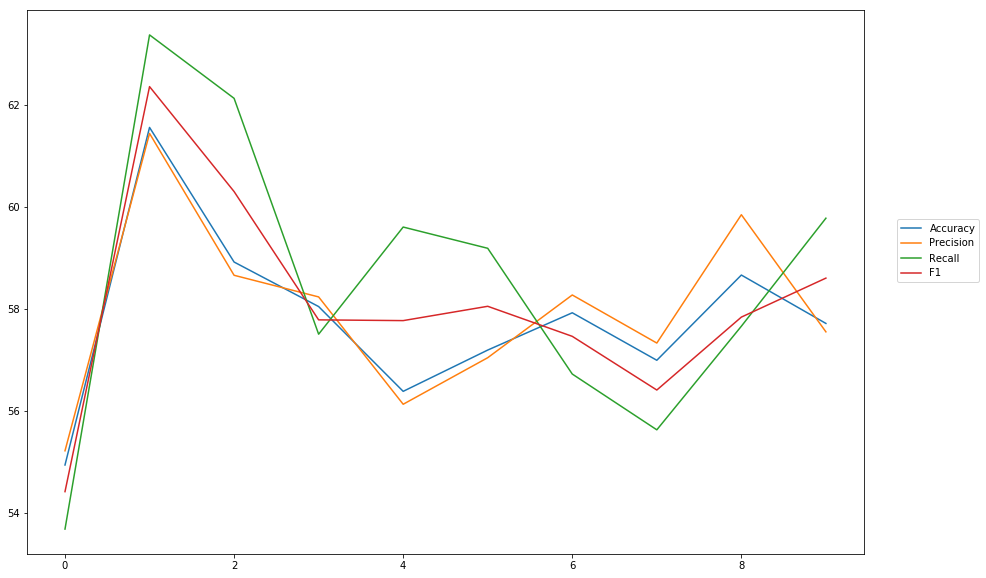

Accuracy: Mean = 57.83% (+/- 1.66%), Max = 61.55%, Min =  54.94%
Precision: Mean = 57.97% (+/- 1.69%), Max = 61.44%, Min =  55.21%
Recall: Mean = 58.52% (+/- 2.77%), Max = 63.37%, Min =  53.68%
F1: Mean = 58.10% (+/- 2.01%), Max = 62.35%, Min =  54.41%


In [8]:
cross_val(model6, NUM_EPOCHS, BATCH_SIZE, optimizer, lossfunction, train_data, train_labels, softmax, outputpath, 'lstm_1_500')  

## LSTM one LSTM-layer, 300 neurons

In [ ]:
wv_layer7 = Embedding(len(word_index)+1,
                     EMBEDDING_DIM,
                     weights=[embedding_matrix],
                     input_length=MAX_SEQUENCE_LENGTH,
                     trainable=True)

#Input Layer
comment_input7 = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')

#Embedding Layer
embedded_sequences7 = wv_layer7(comment_input7)

#LSTM Layer
x7 = LSTM(400, activation='tanh')(embedded_sequences7)

#Output (Dense) Layer
preds7 = Dense(2, activation='softmax')(x7)

# build the model
model7 = Model(inputs=[comment_input7], outputs=preds7)


-----Fold 1--------


Average Accuracy: 58.96%
Average Precision: 59.51%
Average Recall: 56.99%
Average F1: 58.13%

-----Fold 2--------


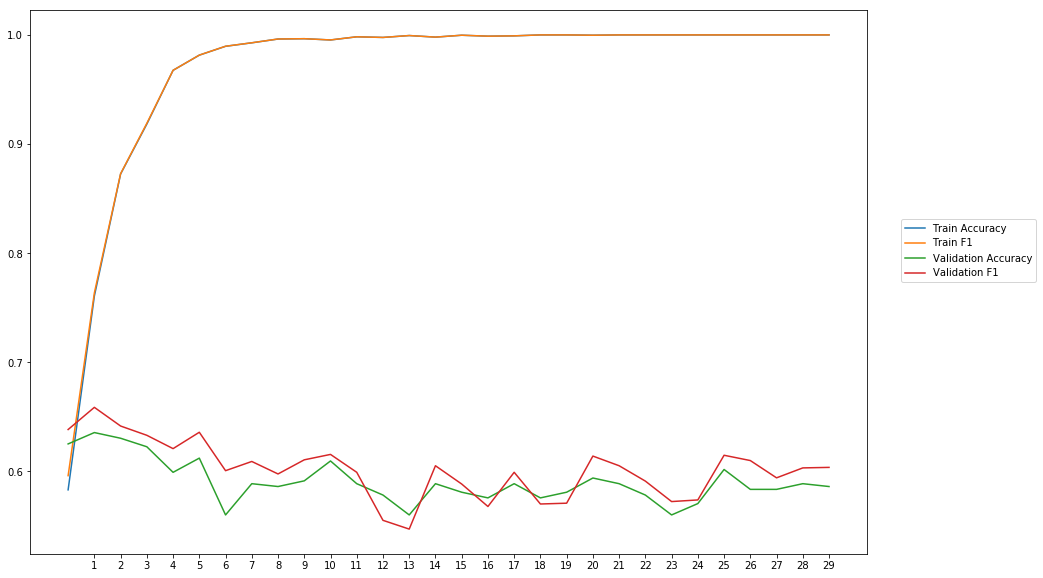

Average Accuracy: 59.03%
Average Precision: 58.81%
Average Recall: 61.64%
Average F1: 60.14%

-----Fold 3--------


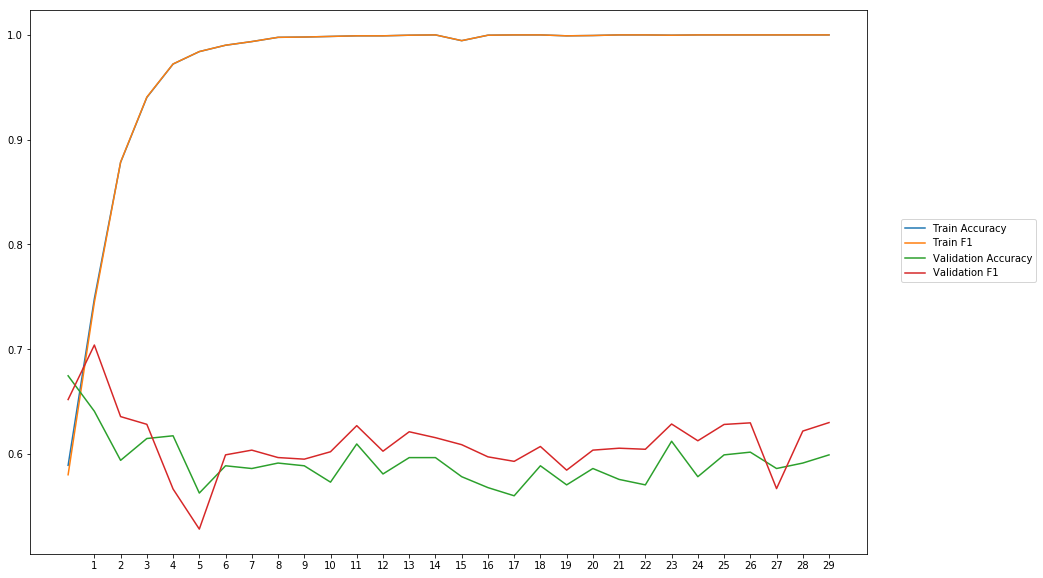

Average Accuracy: 59.25%
Average Precision: 58.90%
Average Recall: 63.66%
Average F1: 60.98%

-----Fold 4--------


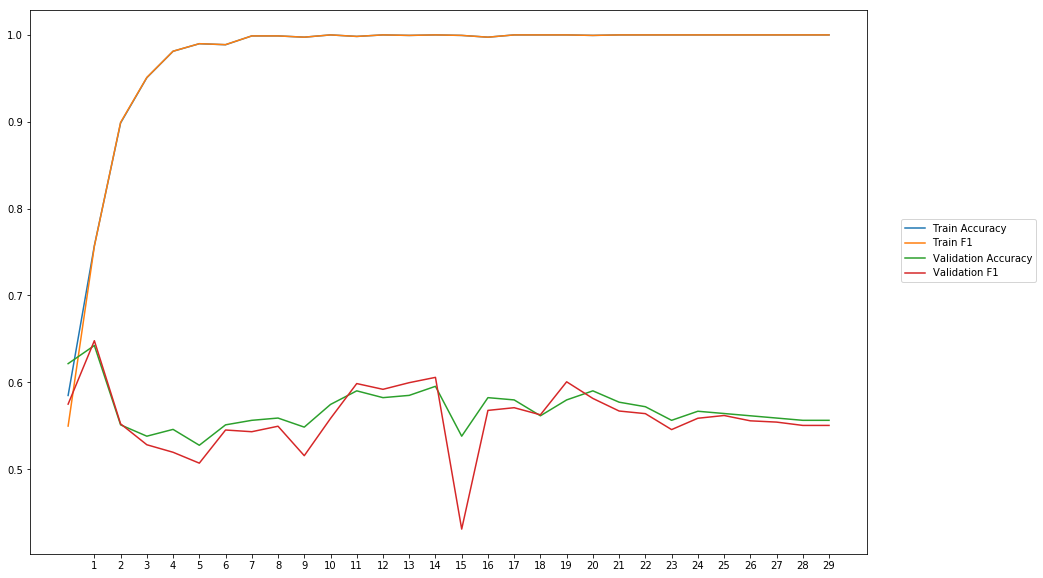

Average Accuracy: 56.88%
Average Precision: 57.34%
Average Recall: 54.69%
Average F1: 55.85%

-----Fold 5--------


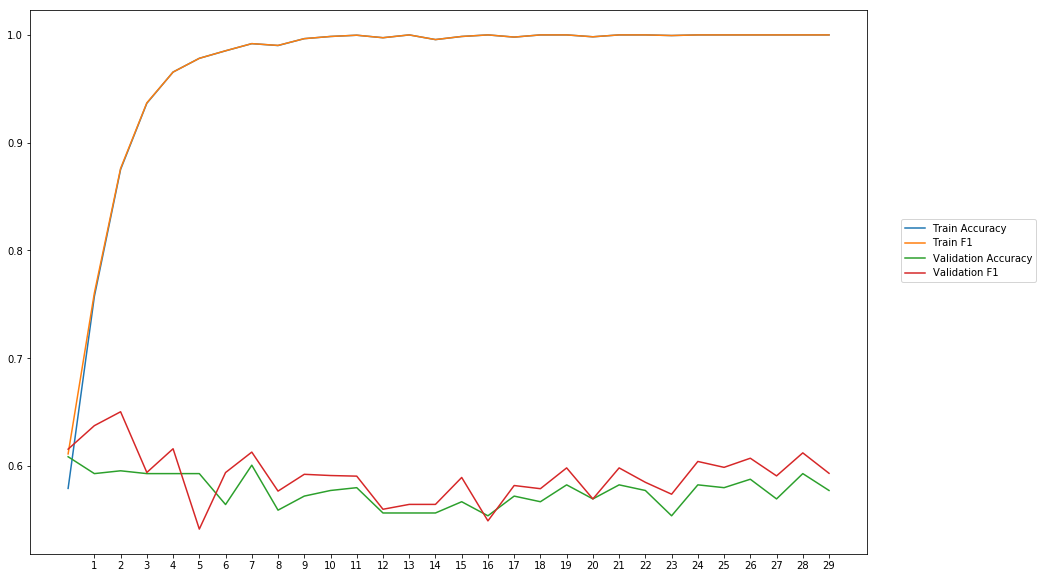

Average Accuracy: 57.68%
Average Precision: 57.35%
Average Recall: 61.13%
Average F1: 59.08%

-----Fold 6--------


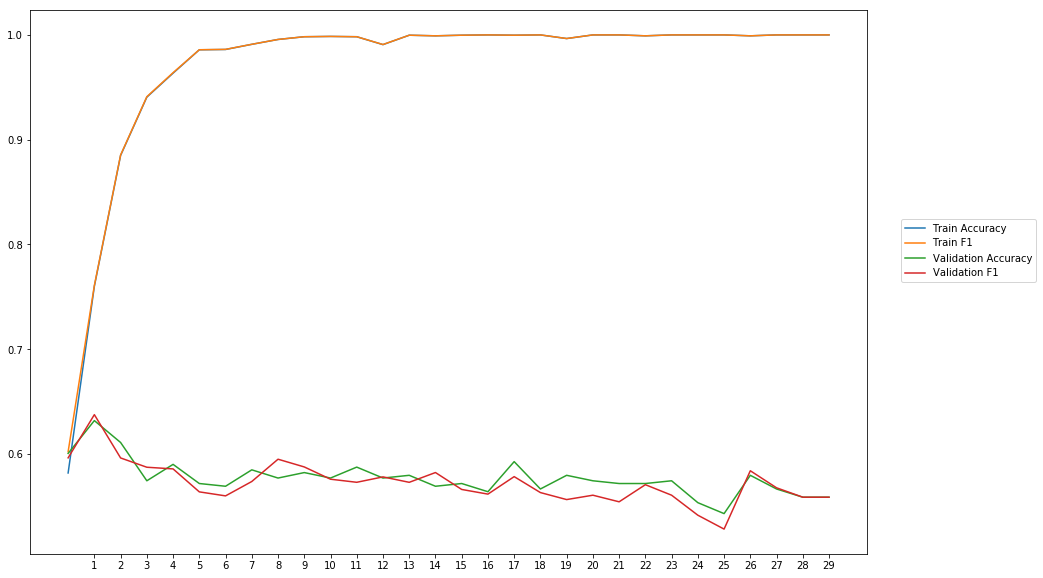

Average Accuracy: 57.70%
Average Precision: 58.03%
Average Recall: 56.56%
Average F1: 57.26%

-----Fold 7--------


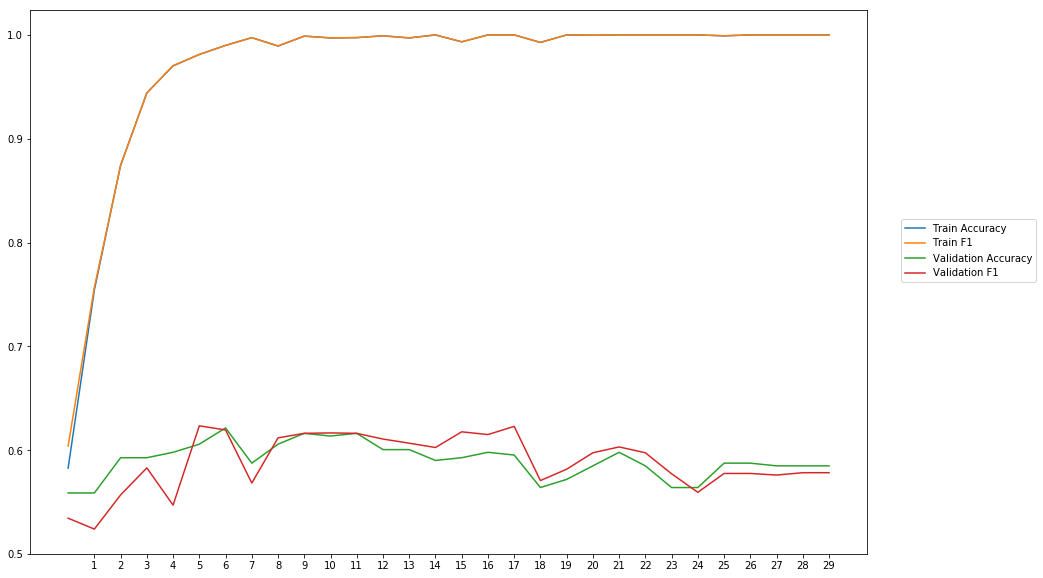

Average Accuracy: 59.02%
Average Precision: 59.23%
Average Recall: 58.77%
Average F1: 58.89%

-----Fold 8--------


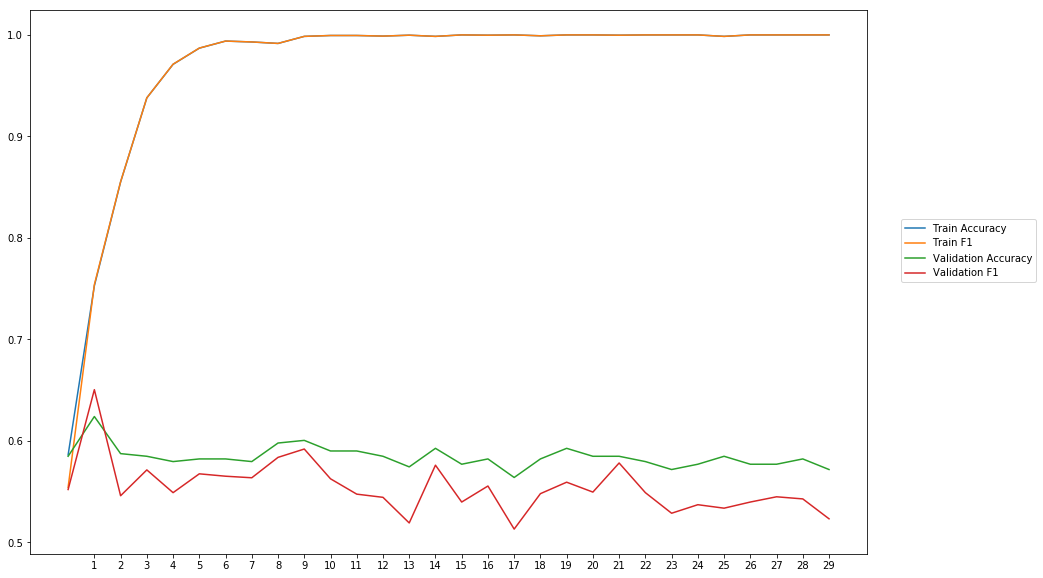

Average Accuracy: 58.42%
Average Precision: 59.84%
Average Recall: 51.82%
Average F1: 55.45%

-----Fold 9--------


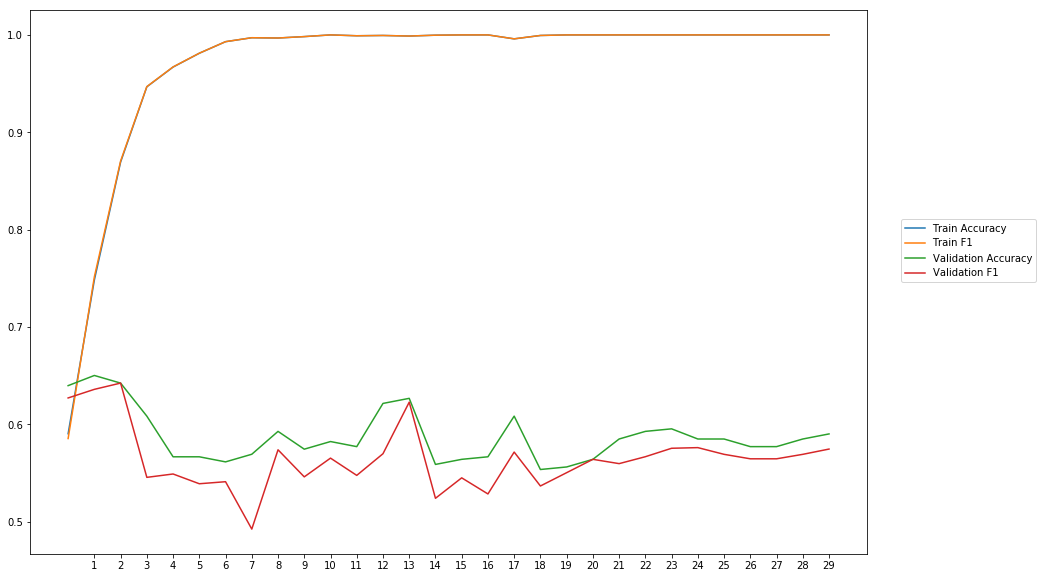

Average Accuracy: 58.74%
Average Precision: 59.98%
Average Recall: 53.49%
Average F1: 56.45%

-----Fold 10--------


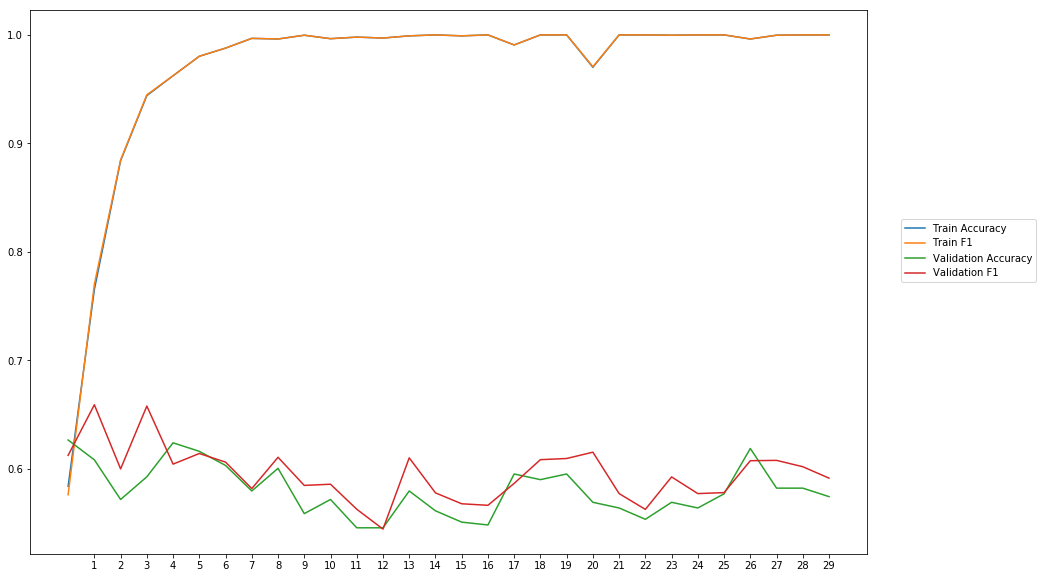

Average Accuracy: 58.07%
Average Precision: 57.76%
Average Recall: 61.72%
Average F1: 59.55%

-------Overallresults-------


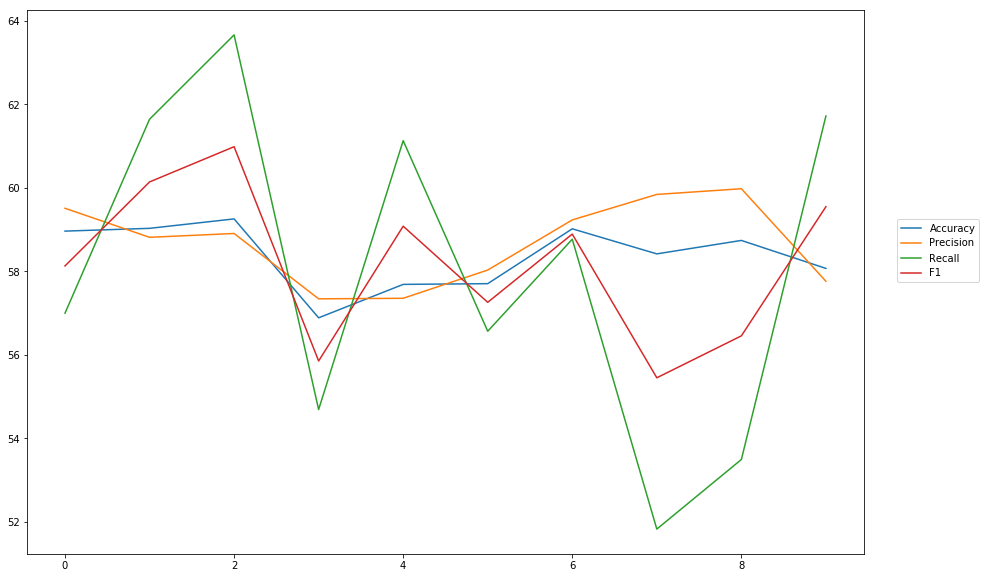

Accuracy: Mean = 58.38% (+/- 0.73%), Max = 59.25%, Min =  56.88%
Precision: Mean = 58.68% (+/- 0.94%), Max = 59.98%, Min =  57.34%
Recall: Mean = 58.05% (+/- 3.77%), Max = 63.66%, Min =  51.82%
F1: Mean = 58.18% (+/- 1.78%), Max = 60.98%, Min =  55.45%


In [9]:
cross_val(model7, NUM_EPOCHS, BATCH_SIZE, optimizer, lossfunction, train_data, train_labels, softmax, outputpath, 'lstm_1_300')  

## Test the best model with heldout testdata

Instructions for updating:
Use tf.cast instead.


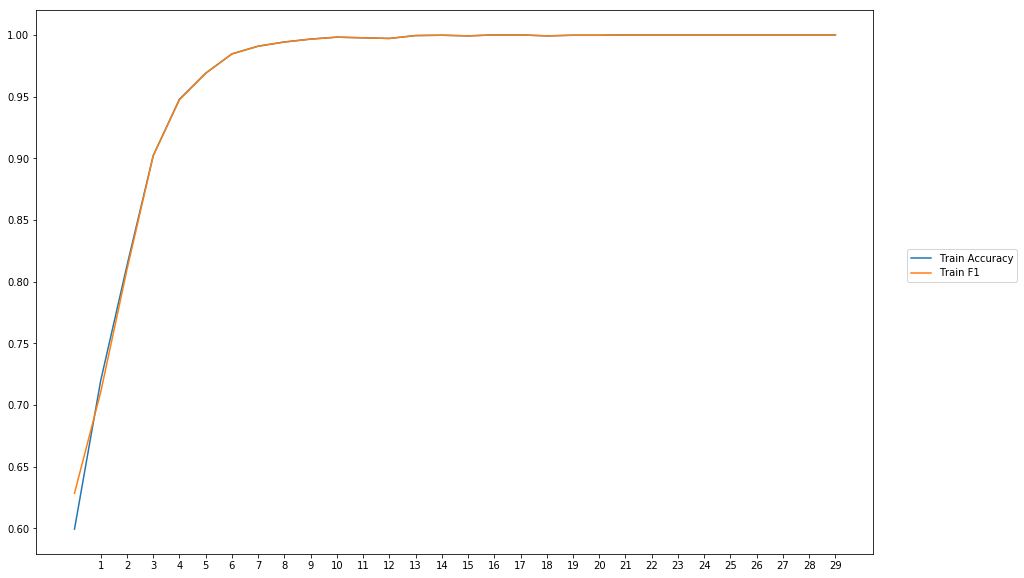


-----Test Scores----
Loss: 4.106133967029805
Accuracy: 63.9030612244898
Precision: 52.95358648671865
Recall: 80.70739547244135
F1: 63.949039785273584


In [9]:
train_evaluate_final_model(model3, NUM_EPOCHS, BATCH_SIZE, optimizer, lossfunction, train_data, train_labels, test_data, test_labels, softmax, outputpath, 'final_LSTM')